In [1]:
#data manipulation
import numpy as np
import pandas as pd

#file processing / requests
from pathlib import Path
from tqdm import tqdm
import json
import urllib

#computer vision
import cv2
import torch
import torchvision

#ML 
from sklearn.model_selection import train_test_split


#display
from IPython.display import display
from pylab import rcParams

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import PIL.Image as Image

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [2]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))

True
0
1
NVIDIA GeForce RTX 3090


In [6]:
!pip freeze

absl-py==0.13.0
alabaster==0.7.12
apex==0.1
appdirs==1.4.4
argon2-cffi==21.1.0
asgiref==3.4.1
attrs==21.2.0
audioread==2.1.9
Babel==2.9.1
backcall @ file:///home/conda/feedstock_root/build_artifacts/backcall_1592338393461/work
backports.functools-lru-cache @ file:///home/conda/feedstock_root/build_artifacts/backports.functools_lru_cache_1618230623929/work
beautifulsoup4 @ file:///home/conda/feedstock_root/build_artifacts/beautifulsoup4_1601745390275/work
bleach==4.1.0
blis @ file:///home/conda/feedstock_root/build_artifacts/cython-blis_1607338147605/work
brotlipy==0.7.0
cachetools==4.2.2
catalogue @ file:///home/conda/feedstock_root/build_artifacts/catalogue_1629144899387/work
certifi==2021.5.30
cffi @ file:///home/conda/feedstock_root/build_artifacts/cffi_1625835293160/work
chardet @ file:///home/conda/feedstock_root/build_artifacts/chardet_1610093490430/work
charset-normalizer @ file:///home/conda/feedstock_root/build_artifacts/charset-normalizer_1626371162869/work
click==7.1.2
codec

In [11]:
%pwd

'/Users/Administrator/DS/IEEE-Big-Data-2020'

In [134]:
import sys
sys.path.append('/Users/Administrator/DS/Object_Detection')
import utils2

from importlib import reload
reload(utils2)
from utils2 import get_files_in_dir, check_img_labels_match, convert_xml_to_yolo

In [18]:
files= get_files_in_dir(path = './train/India/images', extension = 'jpg', show_folders = False)
labels = get_files_in_dir(path = './train/India/annotations/xmls', extension = 'xml', show_folders = False)
print('{} Image files', len(files))
print('{} Label files', len(labels))
print(files[:5])
print(labels[:5])

0.0 sec to complete
0.0 sec to complete
{} Image files 7706
{} Label files 7706
['India_000000.jpg', 'India_000001.jpg', 'India_000002.jpg', 'India_000003.jpg', 'India_000005.jpg']
['India_000000.xml', 'India_000001.xml', 'India_000002.xml', 'India_000003.xml', 'India_000005.xml']


In [133]:
#checking all labels included in training set
from collections import Counter

path = './train/India/labels'
classes = set()
classesdict = Counter()
files= get_files_in_dir(path = path, extension = 'txt', show_folders = False)
for file in files:
    labelpath = path + os.sep + file
    print(labelpath)
    with open(labelpath) as labelfile:
        lines = [line.rstrip() for line in labelfile.readlines()]
        for line in lines:
            classid = line.split(' ')[0]
            classes.add(classid)
            classesdict[classid] += 1
            
print(classes)
print(classesdict)

0.0 sec to complete
./train/India/labels/India_000000.txt
./train/India/labels/India_000001.txt
./train/India/labels/India_000002.txt
./train/India/labels/India_000003.txt
./train/India/labels/India_000005.txt
./train/India/labels/India_000007.txt
./train/India/labels/India_000010.txt
./train/India/labels/India_000011.txt
./train/India/labels/India_000012.txt
./train/India/labels/India_000014.txt
./train/India/labels/India_000016.txt
./train/India/labels/India_000017.txt
./train/India/labels/India_000018.txt
./train/India/labels/India_000019.txt
./train/India/labels/India_000022.txt
./train/India/labels/India_000023.txt
./train/India/labels/India_000024.txt
./train/India/labels/India_000026.txt
./train/India/labels/India_000027.txt
./train/India/labels/India_000028.txt
./train/India/labels/India_000032.txt
./train/India/labels/India_000035.txt
./train/India/labels/India_000036.txt
./train/India/labels/India_000037.txt
./train/India/labels/India_000038.txt
./train/India/labels/India_000

./train/India/labels/India_000390.txt
./train/India/labels/India_000391.txt
./train/India/labels/India_000392.txt
./train/India/labels/India_000393.txt
./train/India/labels/India_000394.txt
./train/India/labels/India_000395.txt
./train/India/labels/India_000399.txt
./train/India/labels/India_000400.txt
./train/India/labels/India_000402.txt
./train/India/labels/India_000403.txt
./train/India/labels/India_000405.txt
./train/India/labels/India_000406.txt
./train/India/labels/India_000407.txt
./train/India/labels/India_000408.txt
./train/India/labels/India_000409.txt
./train/India/labels/India_000410.txt
./train/India/labels/India_000411.txt
./train/India/labels/India_000412.txt
./train/India/labels/India_000414.txt
./train/India/labels/India_000415.txt
./train/India/labels/India_000416.txt
./train/India/labels/India_000417.txt
./train/India/labels/India_000418.txt
./train/India/labels/India_000420.txt
./train/India/labels/India_000421.txt
./train/India/labels/India_000423.txt
./train/Indi

./train/India/labels/India_000761.txt
./train/India/labels/India_000762.txt
./train/India/labels/India_000763.txt
./train/India/labels/India_000764.txt
./train/India/labels/India_000765.txt
./train/India/labels/India_000766.txt
./train/India/labels/India_000768.txt
./train/India/labels/India_000769.txt
./train/India/labels/India_000770.txt
./train/India/labels/India_000771.txt
./train/India/labels/India_000772.txt
./train/India/labels/India_000773.txt
./train/India/labels/India_000775.txt
./train/India/labels/India_000776.txt
./train/India/labels/India_000778.txt
./train/India/labels/India_000779.txt
./train/India/labels/India_000780.txt
./train/India/labels/India_000781.txt
./train/India/labels/India_000782.txt
./train/India/labels/India_000785.txt
./train/India/labels/India_000786.txt
./train/India/labels/India_000787.txt
./train/India/labels/India_000788.txt
./train/India/labels/India_000789.txt
./train/India/labels/India_000790.txt
./train/India/labels/India_000791.txt
./train/Indi

./train/India/labels/India_001143.txt
./train/India/labels/India_001144.txt
./train/India/labels/India_001145.txt
./train/India/labels/India_001146.txt
./train/India/labels/India_001147.txt
./train/India/labels/India_001148.txt
./train/India/labels/India_001149.txt
./train/India/labels/India_001150.txt
./train/India/labels/India_001151.txt
./train/India/labels/India_001153.txt
./train/India/labels/India_001155.txt
./train/India/labels/India_001156.txt
./train/India/labels/India_001158.txt
./train/India/labels/India_001159.txt
./train/India/labels/India_001160.txt
./train/India/labels/India_001161.txt
./train/India/labels/India_001163.txt
./train/India/labels/India_001164.txt
./train/India/labels/India_001165.txt
./train/India/labels/India_001166.txt
./train/India/labels/India_001167.txt
./train/India/labels/India_001168.txt
./train/India/labels/India_001171.txt
./train/India/labels/India_001173.txt
./train/India/labels/India_001174.txt
./train/India/labels/India_001175.txt
./train/Indi

./train/India/labels/India_001561.txt
./train/India/labels/India_001563.txt
./train/India/labels/India_001565.txt
./train/India/labels/India_001566.txt
./train/India/labels/India_001567.txt
./train/India/labels/India_001569.txt
./train/India/labels/India_001571.txt
./train/India/labels/India_001572.txt
./train/India/labels/India_001573.txt
./train/India/labels/India_001574.txt
./train/India/labels/India_001575.txt
./train/India/labels/India_001576.txt
./train/India/labels/India_001578.txt
./train/India/labels/India_001579.txt
./train/India/labels/India_001580.txt
./train/India/labels/India_001581.txt
./train/India/labels/India_001582.txt
./train/India/labels/India_001583.txt
./train/India/labels/India_001584.txt
./train/India/labels/India_001585.txt
./train/India/labels/India_001586.txt
./train/India/labels/India_001587.txt
./train/India/labels/India_001588.txt
./train/India/labels/India_001589.txt
./train/India/labels/India_001590.txt
./train/India/labels/India_001591.txt
./train/Indi

./train/India/labels/India_001971.txt
./train/India/labels/India_001972.txt
./train/India/labels/India_001974.txt
./train/India/labels/India_001977.txt
./train/India/labels/India_001978.txt
./train/India/labels/India_001979.txt
./train/India/labels/India_001980.txt
./train/India/labels/India_001981.txt
./train/India/labels/India_001982.txt
./train/India/labels/India_001983.txt
./train/India/labels/India_001984.txt
./train/India/labels/India_001985.txt
./train/India/labels/India_001986.txt
./train/India/labels/India_001987.txt
./train/India/labels/India_001988.txt
./train/India/labels/India_001989.txt
./train/India/labels/India_001990.txt
./train/India/labels/India_001992.txt
./train/India/labels/India_001993.txt
./train/India/labels/India_001994.txt
./train/India/labels/India_001995.txt
./train/India/labels/India_001996.txt
./train/India/labels/India_001998.txt
./train/India/labels/India_001999.txt
./train/India/labels/India_002000.txt
./train/India/labels/India_002002.txt
./train/Indi

./train/India/labels/India_002372.txt
./train/India/labels/India_002373.txt
./train/India/labels/India_002376.txt
./train/India/labels/India_002378.txt
./train/India/labels/India_002379.txt
./train/India/labels/India_002380.txt
./train/India/labels/India_002381.txt
./train/India/labels/India_002383.txt
./train/India/labels/India_002384.txt
./train/India/labels/India_002385.txt
./train/India/labels/India_002386.txt
./train/India/labels/India_002387.txt
./train/India/labels/India_002388.txt
./train/India/labels/India_002390.txt
./train/India/labels/India_002392.txt
./train/India/labels/India_002393.txt
./train/India/labels/India_002394.txt
./train/India/labels/India_002395.txt
./train/India/labels/India_002396.txt
./train/India/labels/India_002397.txt
./train/India/labels/India_002398.txt
./train/India/labels/India_002400.txt
./train/India/labels/India_002401.txt
./train/India/labels/India_002402.txt
./train/India/labels/India_002404.txt
./train/India/labels/India_002405.txt
./train/Indi

./train/India/labels/India_002743.txt
./train/India/labels/India_002745.txt
./train/India/labels/India_002746.txt
./train/India/labels/India_002747.txt
./train/India/labels/India_002748.txt
./train/India/labels/India_002749.txt
./train/India/labels/India_002750.txt
./train/India/labels/India_002751.txt
./train/India/labels/India_002752.txt
./train/India/labels/India_002753.txt
./train/India/labels/India_002754.txt
./train/India/labels/India_002755.txt
./train/India/labels/India_002756.txt
./train/India/labels/India_002757.txt
./train/India/labels/India_002759.txt
./train/India/labels/India_002763.txt
./train/India/labels/India_002765.txt
./train/India/labels/India_002766.txt
./train/India/labels/India_002767.txt
./train/India/labels/India_002768.txt
./train/India/labels/India_002770.txt
./train/India/labels/India_002771.txt
./train/India/labels/India_002772.txt
./train/India/labels/India_002774.txt
./train/India/labels/India_002775.txt
./train/India/labels/India_002776.txt
./train/Indi

./train/India/labels/India_003116.txt
./train/India/labels/India_003117.txt
./train/India/labels/India_003118.txt
./train/India/labels/India_003119.txt
./train/India/labels/India_003120.txt
./train/India/labels/India_003121.txt
./train/India/labels/India_003122.txt
./train/India/labels/India_003123.txt
./train/India/labels/India_003124.txt
./train/India/labels/India_003125.txt
./train/India/labels/India_003126.txt
./train/India/labels/India_003127.txt
./train/India/labels/India_003128.txt
./train/India/labels/India_003129.txt
./train/India/labels/India_003130.txt
./train/India/labels/India_003131.txt
./train/India/labels/India_003133.txt
./train/India/labels/India_003134.txt
./train/India/labels/India_003135.txt
./train/India/labels/India_003136.txt
./train/India/labels/India_003137.txt
./train/India/labels/India_003138.txt
./train/India/labels/India_003139.txt
./train/India/labels/India_003141.txt
./train/India/labels/India_003142.txt
./train/India/labels/India_003143.txt
./train/Indi

./train/India/labels/India_003522.txt
./train/India/labels/India_003523.txt
./train/India/labels/India_003525.txt
./train/India/labels/India_003526.txt
./train/India/labels/India_003527.txt
./train/India/labels/India_003528.txt
./train/India/labels/India_003530.txt
./train/India/labels/India_003532.txt
./train/India/labels/India_003533.txt
./train/India/labels/India_003535.txt
./train/India/labels/India_003536.txt
./train/India/labels/India_003537.txt
./train/India/labels/India_003538.txt
./train/India/labels/India_003539.txt
./train/India/labels/India_003540.txt
./train/India/labels/India_003542.txt
./train/India/labels/India_003543.txt
./train/India/labels/India_003545.txt
./train/India/labels/India_003546.txt
./train/India/labels/India_003547.txt
./train/India/labels/India_003548.txt
./train/India/labels/India_003550.txt
./train/India/labels/India_003551.txt
./train/India/labels/India_003552.txt
./train/India/labels/India_003553.txt
./train/India/labels/India_003554.txt
./train/Indi

./train/India/labels/India_003893.txt
./train/India/labels/India_003897.txt
./train/India/labels/India_003899.txt
./train/India/labels/India_003900.txt
./train/India/labels/India_003901.txt
./train/India/labels/India_003902.txt
./train/India/labels/India_003903.txt
./train/India/labels/India_003904.txt
./train/India/labels/India_003907.txt
./train/India/labels/India_003908.txt
./train/India/labels/India_003909.txt
./train/India/labels/India_003911.txt
./train/India/labels/India_003913.txt
./train/India/labels/India_003914.txt
./train/India/labels/India_003917.txt
./train/India/labels/India_003918.txt
./train/India/labels/India_003919.txt
./train/India/labels/India_003920.txt
./train/India/labels/India_003921.txt
./train/India/labels/India_003922.txt
./train/India/labels/India_003923.txt
./train/India/labels/India_003925.txt
./train/India/labels/India_003926.txt
./train/India/labels/India_003927.txt
./train/India/labels/India_003928.txt
./train/India/labels/India_003929.txt
./train/Indi

./train/India/labels/India_004234.txt
./train/India/labels/India_004235.txt
./train/India/labels/India_004236.txt
./train/India/labels/India_004237.txt
./train/India/labels/India_004238.txt
./train/India/labels/India_004239.txt
./train/India/labels/India_004240.txt
./train/India/labels/India_004241.txt
./train/India/labels/India_004242.txt
./train/India/labels/India_004243.txt
./train/India/labels/India_004244.txt
./train/India/labels/India_004245.txt
./train/India/labels/India_004246.txt
./train/India/labels/India_004247.txt
./train/India/labels/India_004248.txt
./train/India/labels/India_004249.txt
./train/India/labels/India_004250.txt
./train/India/labels/India_004251.txt
./train/India/labels/India_004252.txt
./train/India/labels/India_004253.txt
./train/India/labels/India_004254.txt
./train/India/labels/India_004255.txt
./train/India/labels/India_004256.txt
./train/India/labels/India_004257.txt
./train/India/labels/India_004258.txt
./train/India/labels/India_004259.txt
./train/Indi

./train/India/labels/India_004568.txt
./train/India/labels/India_004569.txt
./train/India/labels/India_004570.txt
./train/India/labels/India_004571.txt
./train/India/labels/India_004572.txt
./train/India/labels/India_004574.txt
./train/India/labels/India_004575.txt
./train/India/labels/India_004577.txt
./train/India/labels/India_004578.txt
./train/India/labels/India_004579.txt
./train/India/labels/India_004580.txt
./train/India/labels/India_004581.txt
./train/India/labels/India_004583.txt
./train/India/labels/India_004584.txt
./train/India/labels/India_004586.txt
./train/India/labels/India_004587.txt
./train/India/labels/India_004588.txt
./train/India/labels/India_004589.txt
./train/India/labels/India_004592.txt
./train/India/labels/India_004593.txt
./train/India/labels/India_004594.txt
./train/India/labels/India_004595.txt
./train/India/labels/India_004597.txt
./train/India/labels/India_004599.txt
./train/India/labels/India_004600.txt
./train/India/labels/India_004601.txt
./train/Indi

./train/India/labels/India_004913.txt
./train/India/labels/India_004914.txt
./train/India/labels/India_004915.txt
./train/India/labels/India_004916.txt
./train/India/labels/India_004917.txt
./train/India/labels/India_004918.txt
./train/India/labels/India_004919.txt
./train/India/labels/India_004920.txt
./train/India/labels/India_004921.txt
./train/India/labels/India_004922.txt
./train/India/labels/India_004924.txt
./train/India/labels/India_004925.txt
./train/India/labels/India_004926.txt
./train/India/labels/India_004928.txt
./train/India/labels/India_004929.txt
./train/India/labels/India_004931.txt
./train/India/labels/India_004933.txt
./train/India/labels/India_004934.txt
./train/India/labels/India_004935.txt
./train/India/labels/India_004936.txt
./train/India/labels/India_004937.txt
./train/India/labels/India_004938.txt
./train/India/labels/India_004939.txt
./train/India/labels/India_004940.txt
./train/India/labels/India_004941.txt
./train/India/labels/India_004942.txt
./train/Indi

./train/India/labels/India_005254.txt
./train/India/labels/India_005256.txt
./train/India/labels/India_005257.txt
./train/India/labels/India_005258.txt
./train/India/labels/India_005259.txt
./train/India/labels/India_005260.txt
./train/India/labels/India_005261.txt
./train/India/labels/India_005262.txt
./train/India/labels/India_005263.txt
./train/India/labels/India_005266.txt
./train/India/labels/India_005267.txt
./train/India/labels/India_005269.txt
./train/India/labels/India_005270.txt
./train/India/labels/India_005271.txt
./train/India/labels/India_005272.txt
./train/India/labels/India_005273.txt
./train/India/labels/India_005276.txt
./train/India/labels/India_005277.txt
./train/India/labels/India_005278.txt
./train/India/labels/India_005279.txt
./train/India/labels/India_005280.txt
./train/India/labels/India_005282.txt
./train/India/labels/India_005283.txt
./train/India/labels/India_005284.txt
./train/India/labels/India_005285.txt
./train/India/labels/India_005286.txt
./train/Indi

./train/India/labels/India_005592.txt
./train/India/labels/India_005593.txt
./train/India/labels/India_005594.txt
./train/India/labels/India_005595.txt
./train/India/labels/India_005597.txt
./train/India/labels/India_005598.txt
./train/India/labels/India_005600.txt
./train/India/labels/India_005601.txt
./train/India/labels/India_005603.txt
./train/India/labels/India_005605.txt
./train/India/labels/India_005608.txt
./train/India/labels/India_005609.txt
./train/India/labels/India_005610.txt
./train/India/labels/India_005611.txt
./train/India/labels/India_005612.txt
./train/India/labels/India_005613.txt
./train/India/labels/India_005615.txt
./train/India/labels/India_005616.txt
./train/India/labels/India_005617.txt
./train/India/labels/India_005618.txt
./train/India/labels/India_005619.txt
./train/India/labels/India_005620.txt
./train/India/labels/India_005621.txt
./train/India/labels/India_005622.txt
./train/India/labels/India_005623.txt
./train/India/labels/India_005624.txt
./train/Indi

./train/India/labels/India_005914.txt
./train/India/labels/India_005916.txt
./train/India/labels/India_005917.txt
./train/India/labels/India_005918.txt
./train/India/labels/India_005919.txt
./train/India/labels/India_005920.txt
./train/India/labels/India_005921.txt
./train/India/labels/India_005923.txt
./train/India/labels/India_005926.txt
./train/India/labels/India_005927.txt
./train/India/labels/India_005928.txt
./train/India/labels/India_005929.txt
./train/India/labels/India_005930.txt
./train/India/labels/India_005931.txt
./train/India/labels/India_005932.txt
./train/India/labels/India_005933.txt
./train/India/labels/India_005934.txt
./train/India/labels/India_005935.txt
./train/India/labels/India_005936.txt
./train/India/labels/India_005937.txt
./train/India/labels/India_005938.txt
./train/India/labels/India_005939.txt
./train/India/labels/India_005940.txt
./train/India/labels/India_005941.txt
./train/India/labels/India_005942.txt
./train/India/labels/India_005944.txt
./train/Indi

./train/India/labels/India_006249.txt
./train/India/labels/India_006250.txt
./train/India/labels/India_006251.txt
./train/India/labels/India_006252.txt
./train/India/labels/India_006253.txt
./train/India/labels/India_006254.txt
./train/India/labels/India_006255.txt
./train/India/labels/India_006256.txt
./train/India/labels/India_006257.txt
./train/India/labels/India_006258.txt
./train/India/labels/India_006260.txt
./train/India/labels/India_006262.txt
./train/India/labels/India_006265.txt
./train/India/labels/India_006266.txt
./train/India/labels/India_006268.txt
./train/India/labels/India_006269.txt
./train/India/labels/India_006271.txt
./train/India/labels/India_006272.txt
./train/India/labels/India_006273.txt
./train/India/labels/India_006274.txt
./train/India/labels/India_006275.txt
./train/India/labels/India_006277.txt
./train/India/labels/India_006278.txt
./train/India/labels/India_006280.txt
./train/India/labels/India_006281.txt
./train/India/labels/India_006282.txt
./train/Indi

./train/India/labels/India_006663.txt
./train/India/labels/India_006665.txt
./train/India/labels/India_006666.txt
./train/India/labels/India_006667.txt
./train/India/labels/India_006668.txt
./train/India/labels/India_006669.txt
./train/India/labels/India_006670.txt
./train/India/labels/India_006672.txt
./train/India/labels/India_006673.txt
./train/India/labels/India_006674.txt
./train/India/labels/India_006675.txt
./train/India/labels/India_006676.txt
./train/India/labels/India_006677.txt
./train/India/labels/India_006678.txt
./train/India/labels/India_006679.txt
./train/India/labels/India_006681.txt
./train/India/labels/India_006682.txt
./train/India/labels/India_006685.txt
./train/India/labels/India_006686.txt
./train/India/labels/India_006688.txt
./train/India/labels/India_006689.txt
./train/India/labels/India_006690.txt
./train/India/labels/India_006691.txt
./train/India/labels/India_006692.txt
./train/India/labels/India_006693.txt
./train/India/labels/India_006695.txt
./train/Indi

./train/India/labels/India_007071.txt
./train/India/labels/India_007072.txt
./train/India/labels/India_007073.txt
./train/India/labels/India_007074.txt
./train/India/labels/India_007075.txt
./train/India/labels/India_007076.txt
./train/India/labels/India_007080.txt
./train/India/labels/India_007081.txt
./train/India/labels/India_007082.txt
./train/India/labels/India_007083.txt
./train/India/labels/India_007084.txt
./train/India/labels/India_007085.txt
./train/India/labels/India_007086.txt
./train/India/labels/India_007087.txt
./train/India/labels/India_007088.txt
./train/India/labels/India_007089.txt
./train/India/labels/India_007090.txt
./train/India/labels/India_007091.txt
./train/India/labels/India_007094.txt
./train/India/labels/India_007096.txt
./train/India/labels/India_007099.txt
./train/India/labels/India_007100.txt
./train/India/labels/India_007101.txt
./train/India/labels/India_007102.txt
./train/India/labels/India_007104.txt
./train/India/labels/India_007105.txt
./train/Indi

./train/India/labels/India_007496.txt
./train/India/labels/India_007497.txt
./train/India/labels/India_007498.txt
./train/India/labels/India_007499.txt
./train/India/labels/India_007500.txt
./train/India/labels/India_007501.txt
./train/India/labels/India_007502.txt
./train/India/labels/India_007504.txt
./train/India/labels/India_007505.txt
./train/India/labels/India_007506.txt
./train/India/labels/India_007507.txt
./train/India/labels/India_007508.txt
./train/India/labels/India_007509.txt
./train/India/labels/India_007511.txt
./train/India/labels/India_007512.txt
./train/India/labels/India_007513.txt
./train/India/labels/India_007514.txt
./train/India/labels/India_007516.txt
./train/India/labels/India_007517.txt
./train/India/labels/India_007518.txt
./train/India/labels/India_007520.txt
./train/India/labels/India_007525.txt
./train/India/labels/India_007526.txt
./train/India/labels/India_007527.txt
./train/India/labels/India_007529.txt
./train/India/labels/India_007530.txt
./train/Indi

./train/India/labels/India_007841.txt
./train/India/labels/India_007842.txt
./train/India/labels/India_007843.txt
./train/India/labels/India_007844.txt
./train/India/labels/India_007845.txt
./train/India/labels/India_007846.txt
./train/India/labels/India_007848.txt
./train/India/labels/India_007849.txt
./train/India/labels/India_007850.txt
./train/India/labels/India_007851.txt
./train/India/labels/India_007852.txt
./train/India/labels/India_007853.txt
./train/India/labels/India_007854.txt
./train/India/labels/India_007855.txt
./train/India/labels/India_007856.txt
./train/India/labels/India_007857.txt
./train/India/labels/India_007858.txt
./train/India/labels/India_007859.txt
./train/India/labels/India_007860.txt
./train/India/labels/India_007861.txt
./train/India/labels/India_007862.txt
./train/India/labels/India_007863.txt
./train/India/labels/India_007864.txt
./train/India/labels/India_007865.txt
./train/India/labels/India_007866.txt
./train/India/labels/India_007867.txt
./train/Indi

./train/India/labels/India_008173.txt
./train/India/labels/India_008175.txt
./train/India/labels/India_008177.txt
./train/India/labels/India_008178.txt
./train/India/labels/India_008179.txt
./train/India/labels/India_008181.txt
./train/India/labels/India_008182.txt
./train/India/labels/India_008183.txt
./train/India/labels/India_008184.txt
./train/India/labels/India_008185.txt
./train/India/labels/India_008186.txt
./train/India/labels/India_008187.txt
./train/India/labels/India_008188.txt
./train/India/labels/India_008189.txt
./train/India/labels/India_008190.txt
./train/India/labels/India_008192.txt
./train/India/labels/India_008193.txt
./train/India/labels/India_008194.txt
./train/India/labels/India_008195.txt
./train/India/labels/India_008197.txt
./train/India/labels/India_008198.txt
./train/India/labels/India_008204.txt
./train/India/labels/India_008205.txt
./train/India/labels/India_008207.txt
./train/India/labels/India_008208.txt
./train/India/labels/India_008209.txt
./train/Indi

./train/India/labels/India_008526.txt
./train/India/labels/India_008527.txt
./train/India/labels/India_008528.txt
./train/India/labels/India_008529.txt
./train/India/labels/India_008530.txt
./train/India/labels/India_008531.txt
./train/India/labels/India_008532.txt
./train/India/labels/India_008533.txt
./train/India/labels/India_008534.txt
./train/India/labels/India_008535.txt
./train/India/labels/India_008537.txt
./train/India/labels/India_008538.txt
./train/India/labels/India_008539.txt
./train/India/labels/India_008540.txt
./train/India/labels/India_008541.txt
./train/India/labels/India_008542.txt
./train/India/labels/India_008543.txt
./train/India/labels/India_008544.txt
./train/India/labels/India_008545.txt
./train/India/labels/India_008546.txt
./train/India/labels/India_008548.txt
./train/India/labels/India_008549.txt
./train/India/labels/India_008551.txt
./train/India/labels/India_008553.txt
./train/India/labels/India_008554.txt
./train/India/labels/India_008555.txt
./train/Indi

./train/India/labels/India_008861.txt
./train/India/labels/India_008862.txt
./train/India/labels/India_008863.txt
./train/India/labels/India_008864.txt
./train/India/labels/India_008866.txt
./train/India/labels/India_008867.txt
./train/India/labels/India_008868.txt
./train/India/labels/India_008870.txt
./train/India/labels/India_008871.txt
./train/India/labels/India_008872.txt
./train/India/labels/India_008874.txt
./train/India/labels/India_008875.txt
./train/India/labels/India_008878.txt
./train/India/labels/India_008879.txt
./train/India/labels/India_008880.txt
./train/India/labels/India_008881.txt
./train/India/labels/India_008883.txt
./train/India/labels/India_008886.txt
./train/India/labels/India_008887.txt
./train/India/labels/India_008888.txt
./train/India/labels/India_008889.txt
./train/India/labels/India_008890.txt
./train/India/labels/India_008891.txt
./train/India/labels/India_008893.txt
./train/India/labels/India_008894.txt
./train/India/labels/India_008896.txt
./train/Indi

./train/India/labels/India_009193.txt
./train/India/labels/India_009194.txt
./train/India/labels/India_009198.txt
./train/India/labels/India_009199.txt
./train/India/labels/India_009201.txt
./train/India/labels/India_009203.txt
./train/India/labels/India_009205.txt
./train/India/labels/India_009206.txt
./train/India/labels/India_009207.txt
./train/India/labels/India_009208.txt
./train/India/labels/India_009209.txt
./train/India/labels/India_009210.txt
./train/India/labels/India_009212.txt
./train/India/labels/India_009213.txt
./train/India/labels/India_009214.txt
./train/India/labels/India_009215.txt
./train/India/labels/India_009216.txt
./train/India/labels/India_009217.txt
./train/India/labels/India_009218.txt
./train/India/labels/India_009219.txt
./train/India/labels/India_009220.txt
./train/India/labels/India_009221.txt
./train/India/labels/India_009222.txt
./train/India/labels/India_009223.txt
./train/India/labels/India_009224.txt
./train/India/labels/India_009225.txt
./train/Indi

./train/India/labels/India_009565.txt
./train/India/labels/India_009567.txt
./train/India/labels/India_009568.txt
./train/India/labels/India_009570.txt
./train/India/labels/India_009571.txt
./train/India/labels/India_009572.txt
./train/India/labels/India_009573.txt
./train/India/labels/India_009574.txt
./train/India/labels/India_009575.txt
./train/India/labels/India_009576.txt
./train/India/labels/India_009577.txt
./train/India/labels/India_009578.txt
./train/India/labels/India_009579.txt
./train/India/labels/India_009580.txt
./train/India/labels/India_009581.txt
./train/India/labels/India_009582.txt
./train/India/labels/India_009583.txt
./train/India/labels/India_009585.txt
./train/India/labels/India_009586.txt
./train/India/labels/India_009588.txt
./train/India/labels/India_009589.txt
./train/India/labels/India_009590.txt
./train/India/labels/India_009591.txt
./train/India/labels/India_009592.txt
./train/India/labels/India_009593.txt
./train/India/labels/India_009594.txt
./train/Indi

In [129]:
images_not_in_labels, labels_not_in_images = check_img_labels_match(imgspath = './train/India/images', labelspath = './train/India/annotations/xmls', imgsextension = 'jpg',
                                                                    labelsextension = 'xml', show_folders = False)

0.0 sec to complete
0.0 sec to complete
No duplicate image IDs
No duplicate label IDs
All specified image IDs found in labels folder
All specified label IDs found in images folder
1.4 sec to complete


In [137]:
labelsdict = {'D43':'0', 'D50':'1', 'D44':'2', 'D01':'3', 'D10':'3', 'D11':'3', 'D0w0':'4', 'D00':'4', 'D40':'5', 'D20':'6'}
#D0w0 most likely incorrect label D00
#D11 most likely incorrect label for D10
#D01  most likely incorrect label for D10


In [138]:
# labelsdict = {'D00':0,'D10':1,'D20':2,'D40':3,'D43':4,'D44':5,'D50':6}
#ensure destination ./labels folder is created before running function, otherwise will throw FileNotFound Error
convert_xml_to_yolo(path = './train/India/annotations/xmls', labelsdict = labelsdict, extension = 'xml', xmlsdir = 'annotations/xmls')

wrote India_000000.txt
wrote India_000001.txt
wrote India_000002.txt
wrote India_000003.txt
wrote India_000005.txt
wrote India_000007.txt
wrote India_000010.txt
wrote India_000011.txt
wrote India_000012.txt
wrote India_000014.txt
wrote India_000016.txt
wrote India_000017.txt
wrote India_000018.txt
wrote India_000019.txt
wrote India_000022.txt
wrote India_000023.txt
wrote India_000024.txt
wrote India_000026.txt
wrote India_000027.txt
wrote India_000028.txt
wrote India_000032.txt
wrote India_000035.txt
wrote India_000036.txt
wrote India_000037.txt
wrote India_000038.txt
wrote India_000039.txt
wrote India_000040.txt
wrote India_000041.txt
wrote India_000042.txt
wrote India_000043.txt
wrote India_000046.txt
wrote India_000047.txt
wrote India_000049.txt
wrote India_000052.txt
wrote India_000053.txt
wrote India_000054.txt
wrote India_000055.txt
wrote India_000057.txt
wrote India_000059.txt
wrote India_000061.txt
wrote India_000064.txt
wrote India_000066.txt
wrote India_000067.txt
wrote India

wrote India_000484.txt
wrote India_000485.txt
wrote India_000486.txt
wrote India_000487.txt
wrote India_000488.txt
wrote India_000489.txt
wrote India_000492.txt
wrote India_000493.txt
wrote India_000494.txt
wrote India_000495.txt
wrote India_000496.txt
wrote India_000497.txt
wrote India_000498.txt
wrote India_000499.txt
wrote India_000500.txt
wrote India_000501.txt
wrote India_000502.txt
wrote India_000503.txt
wrote India_000504.txt
wrote India_000507.txt
wrote India_000508.txt
wrote India_000509.txt
wrote India_000510.txt
wrote India_000511.txt
wrote India_000512.txt
wrote India_000513.txt
wrote India_000514.txt
wrote India_000516.txt
wrote India_000517.txt
wrote India_000518.txt
wrote India_000519.txt
wrote India_000521.txt
wrote India_000522.txt
wrote India_000524.txt
wrote India_000525.txt
wrote India_000526.txt
wrote India_000527.txt
wrote India_000528.txt
wrote India_000529.txt
wrote India_000532.txt
wrote India_000533.txt
wrote India_000534.txt
wrote India_000535.txt
wrote India

wrote India_000982.txt
wrote India_000984.txt
wrote India_000985.txt
wrote India_000987.txt
wrote India_000988.txt
wrote India_000990.txt
wrote India_000991.txt
wrote India_000992.txt
wrote India_000993.txt
wrote India_000994.txt
wrote India_000995.txt
wrote India_000996.txt
wrote India_000997.txt
wrote India_000998.txt
wrote India_000999.txt
wrote India_001000.txt
wrote India_001001.txt
wrote India_001002.txt
wrote India_001003.txt
wrote India_001004.txt
wrote India_001005.txt
wrote India_001006.txt
wrote India_001007.txt
wrote India_001008.txt
wrote India_001009.txt
wrote India_001010.txt
wrote India_001012.txt
wrote India_001014.txt
wrote India_001015.txt
wrote India_001016.txt
wrote India_001017.txt
wrote India_001018.txt
wrote India_001019.txt
wrote India_001020.txt
wrote India_001021.txt
wrote India_001023.txt
wrote India_001026.txt
wrote India_001027.txt
wrote India_001028.txt
wrote India_001029.txt
wrote India_001030.txt
wrote India_001032.txt
wrote India_001033.txt
wrote India

wrote India_001441.txt
wrote India_001442.txt
wrote India_001443.txt
wrote India_001445.txt
wrote India_001446.txt
wrote India_001448.txt
wrote India_001449.txt
wrote India_001450.txt
wrote India_001451.txt
wrote India_001452.txt
wrote India_001453.txt
wrote India_001454.txt
wrote India_001455.txt
wrote India_001456.txt
wrote India_001457.txt
wrote India_001458.txt
wrote India_001459.txt
wrote India_001461.txt
wrote India_001465.txt
wrote India_001466.txt
wrote India_001467.txt
wrote India_001470.txt
wrote India_001471.txt
wrote India_001472.txt
wrote India_001473.txt
wrote India_001474.txt
wrote India_001475.txt
wrote India_001476.txt
wrote India_001477.txt
wrote India_001478.txt
wrote India_001479.txt
wrote India_001480.txt
wrote India_001481.txt
wrote India_001482.txt
wrote India_001484.txt
wrote India_001485.txt
wrote India_001486.txt
wrote India_001487.txt
wrote India_001488.txt
wrote India_001489.txt
wrote India_001490.txt
wrote India_001491.txt
wrote India_001492.txt
wrote India

wrote India_001902.txt
wrote India_001903.txt
wrote India_001904.txt
wrote India_001905.txt
wrote India_001906.txt
wrote India_001907.txt
wrote India_001908.txt
wrote India_001909.txt
wrote India_001910.txt
wrote India_001911.txt
wrote India_001912.txt
wrote India_001913.txt
wrote India_001914.txt
wrote India_001915.txt
wrote India_001916.txt
wrote India_001917.txt
wrote India_001918.txt
wrote India_001919.txt
wrote India_001922.txt
wrote India_001923.txt
wrote India_001924.txt
wrote India_001925.txt
wrote India_001927.txt
wrote India_001928.txt
wrote India_001929.txt
wrote India_001932.txt
wrote India_001933.txt
wrote India_001934.txt
wrote India_001935.txt
wrote India_001936.txt
wrote India_001939.txt
wrote India_001941.txt
wrote India_001943.txt
wrote India_001944.txt
wrote India_001945.txt
wrote India_001946.txt
wrote India_001948.txt
wrote India_001949.txt
wrote India_001952.txt
wrote India_001953.txt
wrote India_001954.txt
wrote India_001955.txt
wrote India_001956.txt
wrote India

wrote India_002404.txt
wrote India_002405.txt
wrote India_002406.txt
wrote India_002407.txt
wrote India_002409.txt
wrote India_002410.txt
wrote India_002411.txt
wrote India_002412.txt
wrote India_002413.txt
wrote India_002416.txt
wrote India_002417.txt
wrote India_002418.txt
wrote India_002419.txt
wrote India_002421.txt
wrote India_002426.txt
wrote India_002428.txt
wrote India_002429.txt
wrote India_002431.txt
wrote India_002432.txt
wrote India_002433.txt
wrote India_002434.txt
wrote India_002435.txt
wrote India_002436.txt
wrote India_002437.txt
wrote India_002438.txt
wrote India_002439.txt
wrote India_002443.txt
wrote India_002447.txt
wrote India_002448.txt
wrote India_002449.txt
wrote India_002450.txt
wrote India_002451.txt
wrote India_002455.txt
wrote India_002456.txt
wrote India_002459.txt
wrote India_002461.txt
wrote India_002462.txt
wrote India_002463.txt
wrote India_002464.txt
wrote India_002465.txt
wrote India_002466.txt
wrote India_002467.txt
wrote India_002469.txt
wrote India

wrote India_002873.txt
wrote India_002875.txt
wrote India_002877.txt
wrote India_002878.txt
wrote India_002880.txt
wrote India_002881.txt
wrote India_002882.txt
wrote India_002883.txt
wrote India_002884.txt
wrote India_002885.txt
wrote India_002886.txt
wrote India_002889.txt
wrote India_002890.txt
wrote India_002891.txt
wrote India_002892.txt
wrote India_002893.txt
wrote India_002894.txt
wrote India_002895.txt
wrote India_002896.txt
wrote India_002898.txt
wrote India_002899.txt
wrote India_002900.txt
wrote India_002901.txt
wrote India_002903.txt
wrote India_002904.txt
wrote India_002905.txt
wrote India_002906.txt
wrote India_002907.txt
wrote India_002909.txt
wrote India_002910.txt
wrote India_002912.txt
wrote India_002913.txt
wrote India_002914.txt
wrote India_002915.txt
wrote India_002916.txt
wrote India_002917.txt
wrote India_002919.txt
wrote India_002921.txt
wrote India_002922.txt
wrote India_002923.txt
wrote India_002924.txt
wrote India_002925.txt
wrote India_002926.txt
wrote India

wrote India_003395.txt
wrote India_003397.txt
wrote India_003398.txt
wrote India_003399.txt
wrote India_003400.txt
wrote India_003401.txt
wrote India_003402.txt
wrote India_003403.txt
wrote India_003404.txt
wrote India_003405.txt
wrote India_003406.txt
wrote India_003407.txt
wrote India_003408.txt
wrote India_003409.txt
wrote India_003410.txt
wrote India_003411.txt
wrote India_003412.txt
wrote India_003413.txt
wrote India_003414.txt
wrote India_003415.txt
wrote India_003416.txt
wrote India_003417.txt
wrote India_003418.txt
wrote India_003420.txt
wrote India_003421.txt
wrote India_003422.txt
wrote India_003424.txt
wrote India_003425.txt
wrote India_003426.txt
wrote India_003427.txt
wrote India_003428.txt
wrote India_003429.txt
wrote India_003430.txt
wrote India_003431.txt
wrote India_003432.txt
wrote India_003433.txt
wrote India_003434.txt
wrote India_003435.txt
wrote India_003436.txt
wrote India_003437.txt
wrote India_003438.txt
wrote India_003443.txt
wrote India_003444.txt
wrote India

wrote India_003922.txt
wrote India_003923.txt
wrote India_003925.txt
wrote India_003926.txt
wrote India_003927.txt
wrote India_003928.txt
wrote India_003929.txt
wrote India_003935.txt
wrote India_003936.txt
wrote India_003937.txt
wrote India_003938.txt
wrote India_003939.txt
wrote India_003941.txt
wrote India_003942.txt
wrote India_003943.txt
wrote India_003944.txt
wrote India_003946.txt
wrote India_003947.txt
wrote India_003948.txt
wrote India_003949.txt
wrote India_003950.txt
wrote India_003951.txt
wrote India_003952.txt
wrote India_003953.txt
wrote India_003954.txt
wrote India_003958.txt
wrote India_003959.txt
wrote India_003960.txt
wrote India_003961.txt
wrote India_003962.txt
wrote India_003963.txt
wrote India_003964.txt
wrote India_003965.txt
wrote India_003966.txt
wrote India_003967.txt
wrote India_003968.txt
wrote India_003969.txt
wrote India_003970.txt
wrote India_003971.txt
wrote India_003972.txt
wrote India_003973.txt
wrote India_003974.txt
wrote India_003975.txt
wrote India

wrote India_004453.txt
wrote India_004454.txt
wrote India_004455.txt
wrote India_004456.txt
wrote India_004457.txt
wrote India_004458.txt
wrote India_004459.txt
wrote India_004460.txt
wrote India_004461.txt
wrote India_004462.txt
wrote India_004463.txt
wrote India_004464.txt
wrote India_004465.txt
wrote India_004466.txt
wrote India_004468.txt
wrote India_004469.txt
wrote India_004470.txt
wrote India_004471.txt
wrote India_004472.txt
wrote India_004473.txt
wrote India_004476.txt
wrote India_004478.txt
wrote India_004479.txt
wrote India_004480.txt
wrote India_004481.txt
wrote India_004482.txt
wrote India_004483.txt
wrote India_004484.txt
wrote India_004485.txt
wrote India_004486.txt
wrote India_004489.txt
wrote India_004490.txt
wrote India_004492.txt
wrote India_004494.txt
wrote India_004495.txt
wrote India_004497.txt
wrote India_004498.txt
wrote India_004500.txt
wrote India_004502.txt
wrote India_004504.txt
wrote India_004505.txt
wrote India_004506.txt
wrote India_004507.txt
wrote India

wrote India_004963.txt
wrote India_004964.txt
wrote India_004965.txt
wrote India_004968.txt
wrote India_004969.txt
wrote India_004971.txt
wrote India_004972.txt
wrote India_004973.txt
wrote India_004975.txt
wrote India_004977.txt
wrote India_004978.txt
wrote India_004979.txt
wrote India_004980.txt
wrote India_004981.txt
wrote India_004982.txt
wrote India_004983.txt
wrote India_004984.txt
wrote India_004986.txt
wrote India_004987.txt
wrote India_004988.txt
wrote India_004989.txt
wrote India_004991.txt
wrote India_004992.txt
wrote India_004993.txt
wrote India_004994.txt
wrote India_004997.txt
wrote India_004998.txt
wrote India_004999.txt
wrote India_005001.txt
wrote India_005002.txt
wrote India_005003.txt
wrote India_005005.txt
wrote India_005006.txt
wrote India_005007.txt
wrote India_005010.txt
wrote India_005011.txt
wrote India_005012.txt
wrote India_005014.txt
wrote India_005015.txt
wrote India_005016.txt
wrote India_005018.txt
wrote India_005019.txt
wrote India_005020.txt
wrote India

wrote India_005424.txt
wrote India_005426.txt
wrote India_005427.txt
wrote India_005428.txt
wrote India_005429.txt
wrote India_005430.txt
wrote India_005431.txt
wrote India_005433.txt
wrote India_005434.txt
wrote India_005435.txt
wrote India_005436.txt
wrote India_005437.txt
wrote India_005438.txt
wrote India_005439.txt
wrote India_005441.txt
wrote India_005442.txt
wrote India_005444.txt
wrote India_005445.txt
wrote India_005446.txt
wrote India_005447.txt
wrote India_005448.txt
wrote India_005449.txt
wrote India_005451.txt
wrote India_005452.txt
wrote India_005453.txt
wrote India_005454.txt
wrote India_005455.txt
wrote India_005456.txt
wrote India_005457.txt
wrote India_005458.txt
wrote India_005461.txt
wrote India_005463.txt
wrote India_005465.txt
wrote India_005466.txt
wrote India_005467.txt
wrote India_005468.txt
wrote India_005469.txt
wrote India_005470.txt
wrote India_005471.txt
wrote India_005472.txt
wrote India_005473.txt
wrote India_005474.txt
wrote India_005475.txt
wrote India

wrote India_005930.txt
wrote India_005931.txt
wrote India_005932.txt
wrote India_005933.txt
wrote India_005934.txt
wrote India_005935.txt
wrote India_005936.txt
wrote India_005937.txt
wrote India_005938.txt
wrote India_005939.txt
wrote India_005940.txt
wrote India_005941.txt
wrote India_005942.txt
wrote India_005944.txt
wrote India_005945.txt
wrote India_005948.txt
wrote India_005949.txt
wrote India_005950.txt
wrote India_005952.txt
wrote India_005953.txt
wrote India_005954.txt
wrote India_005955.txt
wrote India_005956.txt
wrote India_005957.txt
wrote India_005958.txt
wrote India_005959.txt
wrote India_005961.txt
wrote India_005962.txt
wrote India_005963.txt
wrote India_005964.txt
wrote India_005967.txt
wrote India_005968.txt
wrote India_005969.txt
wrote India_005970.txt
wrote India_005971.txt
wrote India_005972.txt
wrote India_005973.txt
wrote India_005974.txt
wrote India_005975.txt
wrote India_005976.txt
wrote India_005977.txt
wrote India_005978.txt
wrote India_005979.txt
wrote India

wrote India_006449.txt
wrote India_006450.txt
wrote India_006451.txt
wrote India_006452.txt
wrote India_006454.txt
wrote India_006455.txt
wrote India_006459.txt
wrote India_006460.txt
wrote India_006462.txt
wrote India_006463.txt
wrote India_006464.txt
wrote India_006465.txt
wrote India_006466.txt
wrote India_006469.txt
wrote India_006470.txt
wrote India_006473.txt
wrote India_006474.txt
wrote India_006475.txt
wrote India_006476.txt
wrote India_006478.txt
wrote India_006479.txt
wrote India_006480.txt
wrote India_006481.txt
wrote India_006482.txt
wrote India_006483.txt
wrote India_006485.txt
wrote India_006486.txt
wrote India_006487.txt
wrote India_006488.txt
wrote India_006490.txt
wrote India_006491.txt
wrote India_006493.txt
wrote India_006494.txt
wrote India_006495.txt
wrote India_006496.txt
wrote India_006497.txt
wrote India_006498.txt
wrote India_006499.txt
wrote India_006501.txt
wrote India_006502.txt
wrote India_006504.txt
wrote India_006505.txt
wrote India_006506.txt
wrote India

wrote India_006982.txt
wrote India_006983.txt
wrote India_006984.txt
wrote India_006985.txt
wrote India_006986.txt
wrote India_006987.txt
wrote India_006988.txt
wrote India_006989.txt
wrote India_006991.txt
wrote India_006992.txt
wrote India_006993.txt
wrote India_006994.txt
wrote India_006995.txt
wrote India_006996.txt
wrote India_006997.txt
wrote India_006998.txt
wrote India_006999.txt
wrote India_007000.txt
wrote India_007001.txt
wrote India_007002.txt
wrote India_007004.txt
wrote India_007006.txt
wrote India_007007.txt
wrote India_007008.txt
wrote India_007009.txt
wrote India_007011.txt
wrote India_007012.txt
wrote India_007013.txt
wrote India_007015.txt
wrote India_007016.txt
wrote India_007017.txt
wrote India_007018.txt
wrote India_007019.txt
wrote India_007020.txt
wrote India_007022.txt
wrote India_007023.txt
wrote India_007024.txt
wrote India_007025.txt
wrote India_007026.txt
wrote India_007027.txt
wrote India_007029.txt
wrote India_007030.txt
wrote India_007031.txt
wrote India

wrote India_007431.txt
wrote India_007432.txt
wrote India_007433.txt
wrote India_007434.txt
wrote India_007436.txt
wrote India_007438.txt
wrote India_007439.txt
wrote India_007440.txt
wrote India_007441.txt
wrote India_007442.txt
wrote India_007449.txt
wrote India_007450.txt
wrote India_007451.txt
wrote India_007452.txt
wrote India_007453.txt
wrote India_007454.txt
wrote India_007455.txt
wrote India_007456.txt
wrote India_007457.txt
wrote India_007458.txt
wrote India_007459.txt
wrote India_007460.txt
wrote India_007462.txt
wrote India_007463.txt
wrote India_007464.txt
wrote India_007465.txt
wrote India_007466.txt
wrote India_007468.txt
wrote India_007469.txt
wrote India_007470.txt
wrote India_007472.txt
wrote India_007474.txt
wrote India_007476.txt
wrote India_007477.txt
wrote India_007478.txt
wrote India_007479.txt
wrote India_007481.txt
wrote India_007482.txt
wrote India_007483.txt
wrote India_007484.txt
wrote India_007486.txt
wrote India_007487.txt
wrote India_007488.txt
wrote India

wrote India_007946.txt
wrote India_007947.txt
wrote India_007949.txt
wrote India_007950.txt
wrote India_007951.txt
wrote India_007952.txt
wrote India_007953.txt
wrote India_007954.txt
wrote India_007955.txt
wrote India_007956.txt
wrote India_007959.txt
wrote India_007961.txt
wrote India_007962.txt
wrote India_007964.txt
wrote India_007965.txt
wrote India_007966.txt
wrote India_007968.txt
wrote India_007970.txt
wrote India_007972.txt
wrote India_007973.txt
wrote India_007974.txt
wrote India_007975.txt
wrote India_007976.txt
wrote India_007977.txt
wrote India_007978.txt
wrote India_007979.txt
wrote India_007981.txt
wrote India_007982.txt
wrote India_007983.txt
wrote India_007984.txt
wrote India_007985.txt
wrote India_007986.txt
wrote India_007987.txt
wrote India_007989.txt
wrote India_007991.txt
wrote India_007992.txt
wrote India_007993.txt
wrote India_007996.txt
wrote India_007997.txt
wrote India_007998.txt
wrote India_007999.txt
wrote India_008000.txt
wrote India_008001.txt
wrote India

wrote India_008473.txt
wrote India_008474.txt
wrote India_008475.txt
wrote India_008476.txt
wrote India_008478.txt
wrote India_008479.txt
wrote India_008480.txt
wrote India_008481.txt
wrote India_008483.txt
wrote India_008484.txt
wrote India_008486.txt
wrote India_008488.txt
wrote India_008489.txt
wrote India_008492.txt
wrote India_008494.txt
wrote India_008495.txt
wrote India_008496.txt
wrote India_008497.txt
wrote India_008498.txt
wrote India_008499.txt
wrote India_008501.txt
wrote India_008502.txt
wrote India_008503.txt
wrote India_008504.txt
wrote India_008505.txt
wrote India_008507.txt
wrote India_008510.txt
wrote India_008511.txt
wrote India_008512.txt
wrote India_008513.txt
wrote India_008515.txt
wrote India_008516.txt
wrote India_008517.txt
wrote India_008518.txt
wrote India_008522.txt
wrote India_008523.txt
wrote India_008524.txt
wrote India_008525.txt
wrote India_008526.txt
wrote India_008527.txt
wrote India_008528.txt
wrote India_008529.txt
wrote India_008530.txt
wrote India

wrote India_009002.txt
wrote India_009004.txt
wrote India_009005.txt
wrote India_009007.txt
wrote India_009009.txt
wrote India_009010.txt
wrote India_009011.txt
wrote India_009013.txt
wrote India_009014.txt
wrote India_009015.txt
wrote India_009017.txt
wrote India_009018.txt
wrote India_009020.txt
wrote India_009021.txt
wrote India_009022.txt
wrote India_009023.txt
wrote India_009025.txt
wrote India_009026.txt
wrote India_009027.txt
wrote India_009029.txt
wrote India_009030.txt
wrote India_009031.txt
wrote India_009032.txt
wrote India_009033.txt
wrote India_009034.txt
wrote India_009035.txt
wrote India_009036.txt
wrote India_009037.txt
wrote India_009038.txt
wrote India_009039.txt
wrote India_009040.txt
wrote India_009041.txt
wrote India_009042.txt
wrote India_009044.txt
wrote India_009045.txt
wrote India_009046.txt
wrote India_009047.txt
wrote India_009048.txt
wrote India_009049.txt
wrote India_009051.txt
wrote India_009053.txt
wrote India_009054.txt
wrote India_009055.txt
wrote India

wrote India_009535.txt
wrote India_009536.txt
wrote India_009538.txt
wrote India_009539.txt
wrote India_009541.txt
wrote India_009542.txt
wrote India_009544.txt
wrote India_009545.txt
wrote India_009546.txt
wrote India_009547.txt
wrote India_009548.txt
wrote India_009549.txt
wrote India_009550.txt
wrote India_009551.txt
wrote India_009552.txt
wrote India_009553.txt
wrote India_009554.txt
wrote India_009555.txt
wrote India_009556.txt
wrote India_009557.txt
wrote India_009559.txt
wrote India_009560.txt
wrote India_009562.txt
wrote India_009564.txt
wrote India_009565.txt
wrote India_009567.txt
wrote India_009568.txt
wrote India_009570.txt
wrote India_009571.txt
wrote India_009572.txt
wrote India_009573.txt
wrote India_009574.txt
wrote India_009575.txt
wrote India_009576.txt
wrote India_009577.txt
wrote India_009578.txt
wrote India_009579.txt
wrote India_009580.txt
wrote India_009581.txt
wrote India_009582.txt
wrote India_009583.txt
wrote India_009585.txt
wrote India_009586.txt
wrote India

'Done creating txts from xmls in ./train/India/labels'

In [139]:
#rechecking no missing files in either folder following conversion
images_not_in_labels, labels_not_in_images = check_img_labels_match(imgspath = './train/India/images', labelspath = './train/India/labels', imgsextension = 'jpg',
                                                                    labelsextension = 'txt', show_folders = False)

0.0 sec to complete
0.0 sec to complete
No duplicate image IDs
No duplicate label IDs
All specified image IDs found in labels folder
All specified label IDs found in images folder
1.4 sec to complete


In [140]:
#rechecking no missing files in either folder following conversion
images_not_in_labels, labels_not_in_images = check_img_labels_match(imgspath = './val/India/images', labelspath = './val/India/labels', imgsextension = 'jpg',
                                                                    labelsextension = 'txt', show_folders = False)

0.0 sec to complete
0.0 sec to complete
No duplicate image IDs
No duplicate label IDs
All specified image IDs found in labels folder
All specified label IDs found in images folder
0.0 sec to complete


0.0 sec to complete
India_000007.jpg
./train/India/labels/India_000007.txt ./train/India/images/India_000007.jpg
[]


India_000010.jpg
./train/India/labels/India_000010.txt ./train/India/images/India_000010.jpg
['D44 0.663194 0.759028 0.045833 0.073611']
Label D44 0.663194 0.759028 0.045833 0.073611
lb  D44
dims pre 0.663194 0.759028 0.045833 0.073611
dims post 477.49967999999996 546.50016 32.99976 52.999919999999996
477 546 32 52


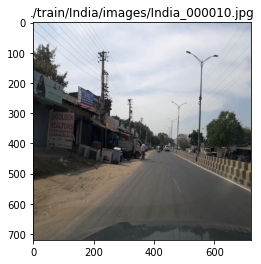

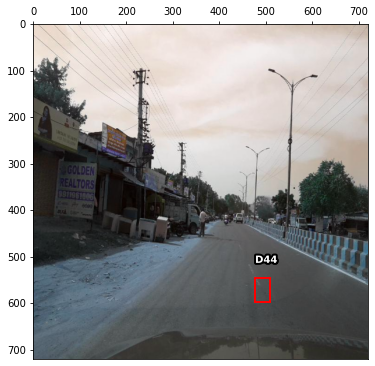



India_000011.jpg
./train/India/labels/India_000011.txt ./train/India/images/India_000011.jpg
['D00 0.528472 0.722917 0.034722 0.162500']
Label D00 0.528472 0.722917 0.034722 0.162500
lb  D00
dims pre 0.528472 0.722917 0.034722 0.1625
dims post 380.49984000000006 520.5002400000001 24.999840000000003 117.0
380 520 24 117


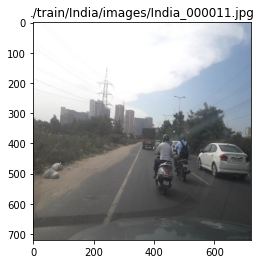

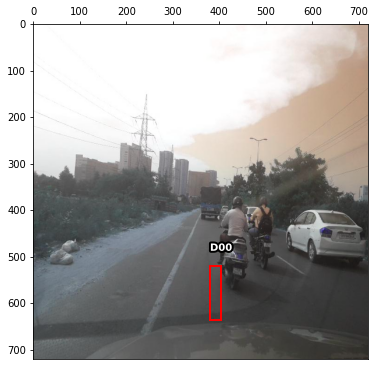



India_000012.jpg
./train/India/labels/India_000012.txt ./train/India/images/India_000012.jpg
[]


India_000014.jpg
./train/India/labels/India_000014.txt ./train/India/images/India_000014.jpg
['D20 0.550694 0.847222 0.256944 0.225000', 'D20 0.157639 0.856944 0.312500 0.252778', 'D44 0.415972 0.843056 0.106944 0.163889']
Label D20 0.550694 0.847222 0.256944 0.225000
lb  D20
dims pre 0.550694 0.847222 0.256944 0.225
dims post 396.49968 609.9998400000001 184.99968 162.0
396 609 184 162
Label D20 0.157639 0.856944 0.312500 0.252778
lb  D20
dims pre 0.157639 0.856944 0.3125 0.252778
dims post 113.50008 616.99968 225.0 182.00016
113 616 225 182
Label D44 0.415972 0.843056 0.106944 0.163889
lb  D44
dims pre 0.415972 0.843056 0.106944 0.163889
dims post 299.49984 607.00032 76.99968 118.00008000000001
299 607 76 118


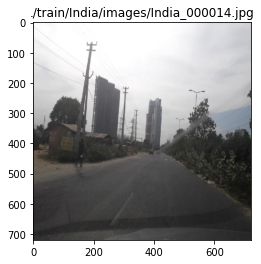

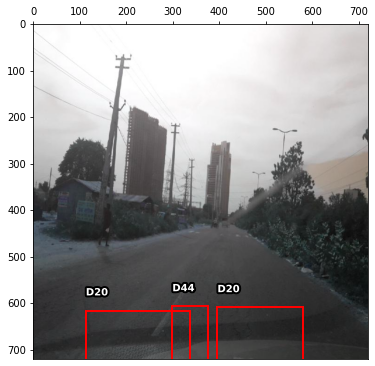



India_000016.jpg
./train/India/labels/India_000016.txt ./train/India/images/India_000016.jpg
[]


India_000017.jpg
./train/India/labels/India_000017.txt ./train/India/images/India_000017.jpg
['D44 0.336111 0.771528 0.252778 0.168056', 'D40 0.349306 0.897222 0.123611 0.088889', 'D40 0.520139 0.895833 0.168056 0.080556', 'D40 0.450694 0.791667 0.168056 0.080556', 'D40 0.620833 0.798611 0.136111 0.077778']
Label D44 0.336111 0.771528 0.252778 0.168056
lb  D44
dims pre 0.336111 0.771528 0.252778 0.168056
dims post 241.99992 555.50016 182.00016 121.00032
241 555 182 121
Label D40 0.349306 0.897222 0.123611 0.088889
lb  D40
dims pre 0.349306 0.897222 0.123611 0.088889
dims post 251.50032000000002 645.99984 88.99992 64.00008
251 645 88 64
Label D40 0.520139 0.895833 0.168056 0.080556
lb  D40
dims pre 0.520139 0.895833 0.168056 0.080556
dims post 374.50008 644.99976 121.00032 58.00032
374 644 121 58
Label D40 0.450694 0.791667 0.168056 0.080556
lb  D40
dims pre 0.450694 0.791667 0.168056 0.0

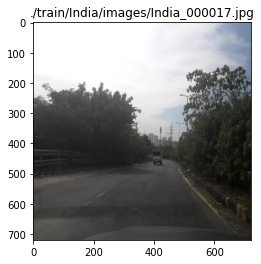

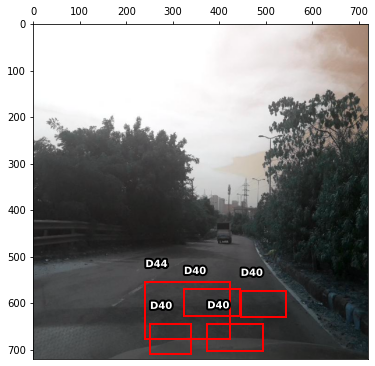



India_000018.jpg
./train/India/labels/India_000018.txt ./train/India/images/India_000018.jpg
[]


India_000019.jpg
./train/India/labels/India_000019.txt ./train/India/images/India_000019.jpg
[]


India_000022.jpg
./train/India/labels/India_000022.txt ./train/India/images/India_000022.jpg
[]




'Done showing 5:15 images'

In [83]:
import PIL
from matplotlib import patches, patheffects
import os

# img_path = './train/India/images/India_000005.jpg'
# img = cv2.imread(img_path)
# color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(color)
# plt.title('Image')
# fig, ax = plt.subplots(figsize = (6,9))

pil_image = PIL.Image.open('./train/India/images/India_000005.jpg')
imgwidth, imgheight = pil_image.size

def show_preds2(imgspath, start = 0, end = 10, **kwargs):

    files= get_files_in_dir(path = imgspath, **kwargs)
    for file in files[start:end]:
        print(file)
        labelpath = imgspath.replace('images','labels',1) + os.sep + file.replace('jpg','txt',1)
        imgpath = imgspath + os.sep + file
        print(labelpath, imgpath)
        with open(labelpath) as labelfile:
            lines = [line.rstrip() for line in labelfile.readlines()] 
            print(lines)
            if len(lines) > 0:
                
                img = cv2.imread(imgpath)
                color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                plt.imshow(color)
                plt.title(imgpath)
                pil_image = PIL.Image.open('./train/India/images/India_000005.jpg')
                imgwidth, imgheight = pil_image.size
                fig, ax = plt.subplots(figsize = (6,9))

                for label in lines:
                    
                    print('Label',label)
                    lb = label.split(' ')[0]
                    print('lb ', lb)
                    x, y, w, h = [float(i) for i in label.split(' ')[1:]] 
                    print('dims pre', x, y, w, h)
                    x *= imgwidth
                    w *= imgwidth
                    y *= imgheight
                    h *= imgheight
                    print('dims post', x, y, w, h)
                    x, y, w, h = [int(i) for i in [x, y, w, h]]
                    print(x, y, w, h)
                    ax.xaxis.tick_top()
                    ax.add_patch(patches.Rectangle((x,y),w,h, fill=False, edgecolor='red', lw=2))
                    ax.text(x,(y-50),str(lb),verticalalignment='top', color='white',fontsize=10,
                            weight='bold').set_path_effects([patheffects.Stroke(linewidth=4, foreground='black'), patheffects.Normal()])
#                 plt.show(img)
                ax.imshow(img)
                plt.pause(1)
                ax.cla()
        print('\n')
    
    return f'''Done showing {start}:{end} images'''
            
show_preds2(imgspath = './train/India/images', start = 5, end = 15, extension = 'jpg', show_folders = False)
    
# labels = ['D40 0.269444 0.728472 0.483333 0.143056']
# for l in labels:
#     lb = l.split(' ')[0]
#     x, y, w, h = [float(i) for i in l.split(' ')[1:]] 
#     x *= imgwidth
#     w *= imgwidth
#     y *= imgheight
#     h *= imgheight
#     x, y, w, h = [int(i) for i in [x, y, w, h]]
#     print(x, y, w, h)
#     ax.xaxis.tick_top()
#     ax.add_patch(patches.Rectangle((x,y),w,h, fill=False, edgecolor='red', lw=2))
#     ax.text(x,(y-50),str(lb),verticalalignment='top', color='white',fontsize=10,
#             weight='bold').set_path_effects([patheffects.Stroke(linewidth=4, foreground='black'), patheffects.Normal()])
# print(img_path)
# ax.imshow(img)

In [ ]:
#checking against base annotation files

In [87]:
#data manipulation
import numpy as np
import pandas as pd

#file processing / requests
from pathlib import Path
from tqdm import tqdm
import json
import urllib
from xml.dom import minidom
import os
import glob
from os import walk


#computer vision
import cv2
import torch
import torchvision

#ML 
from sklearn.model_selection import train_test_split

#display
from IPython.display import display
from pylab import rcParams

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc, patches, patheffects
import PIL.Image as Image

#styling
from typing import List, Dict

import time 

#ensure destination ./labels folder is created before running function, otherwise will throw FileNotFound Error

def convert_coordinates(size, box, normalize = True):
    dw = 1.0/size[0]
    dh = 1.0/size[1]
    x = (box[0]+box[1])/2.0
    y = (box[2]+box[3])/2.0
    w = box[1]-box[0]
    h = box[3]-box[2]
    if normalize:
        x = x*dw
        w = w*dw
        y = y*dh
        h = h*dh
    return (x,y,w,h)


def convert_xml_to_yolo(path, extension = 'xml', xmlsdir = 'xmls', normalize = True):
    '''Inputs:
    extension: make sure to pass without any punctuation, i.e. India_0001.xml should be extension = 'xml' '''

    files = [f for f in next(walk(path), (None, None, []))[2] if f.endswith(extension)] 
    
    for file in files[5:15]:
        xmldoc = minidom.parse(path + os.sep + file)
        idx = len(extension) + 1
        fname_out = (file[:-idx]+'.txt')
        outpath = path.replace(xmlsdir, 'labels2', 1) + os.sep + fname_out

        with open(outpath, "w") as f:

            itemlist = xmldoc.getElementsByTagName('object')
            size = xmldoc.getElementsByTagName('size')[0]
            width = int((size.getElementsByTagName('width')[0]).firstChild.data)
            height = int((size.getElementsByTagName('height')[0]).firstChild.data)

            for item in itemlist:
                # get class label
                classid =  (item.getElementsByTagName('name')[0]).firstChild.data

                # get bbox coordinates
                xmin = ((item.getElementsByTagName('bndbox')[0]).getElementsByTagName('xmin')[0]).firstChild.data
                ymin = ((item.getElementsByTagName('bndbox')[0]).getElementsByTagName('ymin')[0]).firstChild.data
                xmax = ((item.getElementsByTagName('bndbox')[0]).getElementsByTagName('xmax')[0]).firstChild.data
                ymax = ((item.getElementsByTagName('bndbox')[0]).getElementsByTagName('ymax')[0]).firstChild.data
                b = (float(xmin), float(xmax), float(ymin), float(ymax))
                if normalize:
                    bb = convert_coordinates((width,height), b, normalize = True)
                else: bb = convert_coordinates((width,height), b, normalize = False)
                f.write(classid + " " + " ".join([("%.6f" % a) for a in bb]) + '\n')

        print ("wrote %s" % fname_out)
    return 'Done creating txts from xmls in {}'.format(path.replace(xmlsdir, 'labels', 1))


convert_xml_to_yolo(path = './train/India/annotations/xmls', extension = 'xml', xmlsdir = 'annotations/xmls', normalize = False)

wrote India_000007.txt
wrote India_000010.txt
wrote India_000011.txt
wrote India_000012.txt
wrote India_000014.txt
wrote India_000016.txt
wrote India_000017.txt
wrote India_000018.txt
wrote India_000019.txt
wrote India_000022.txt


'Done creating txts from xmls in ./train/India/labels'

0.0 sec to complete
India_000007.jpg
./train/India/labels2/India_000007.txt ./train/India/images/India_000007.jpg
[]


India_000010.jpg
./train/India/labels2/India_000010.txt ./train/India/images/India_000010.jpg
['D44 477.500000 546.500000 33.000000 53.000000']
Label D44 477.500000 546.500000 33.000000 53.000000
lb  D44
477 546 33 53


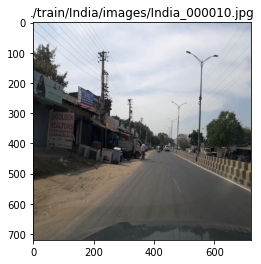

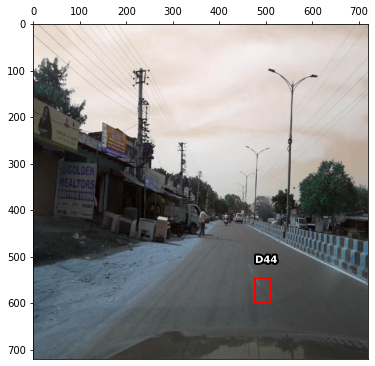



India_000011.jpg
./train/India/labels2/India_000011.txt ./train/India/images/India_000011.jpg
['D00 380.500000 520.500000 25.000000 117.000000']
Label D00 380.500000 520.500000 25.000000 117.000000
lb  D00
380 520 25 117


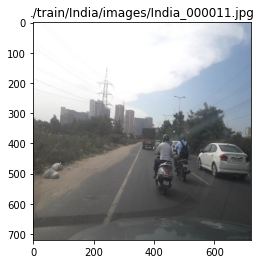

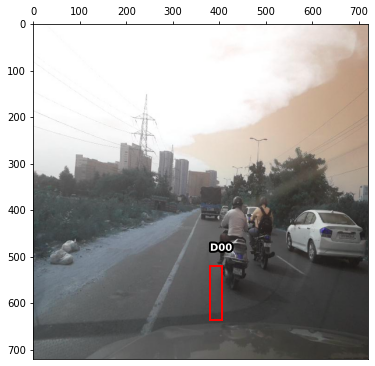



India_000012.jpg
./train/India/labels2/India_000012.txt ./train/India/images/India_000012.jpg
[]


India_000014.jpg
./train/India/labels2/India_000014.txt ./train/India/images/India_000014.jpg
['D20 396.500000 610.000000 185.000000 162.000000', 'D20 113.500000 617.000000 225.000000 182.000000', 'D44 299.500000 607.000000 77.000000 118.000000']
Label D20 396.500000 610.000000 185.000000 162.000000
lb  D20
396 610 185 162
Label D20 113.500000 617.000000 225.000000 182.000000
lb  D20
113 617 225 182
Label D44 299.500000 607.000000 77.000000 118.000000
lb  D44
299 607 77 118


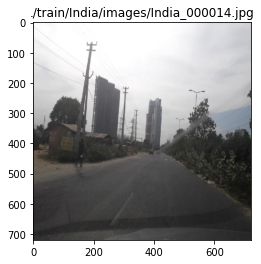

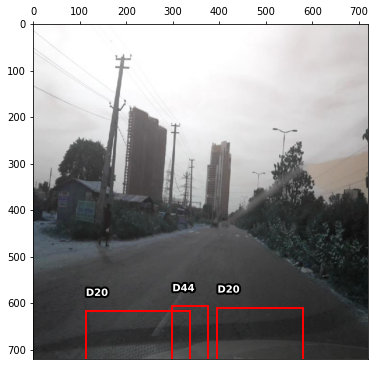



India_000016.jpg
./train/India/labels2/India_000016.txt ./train/India/images/India_000016.jpg
[]


India_000017.jpg
./train/India/labels2/India_000017.txt ./train/India/images/India_000017.jpg
['D44 242.000000 555.500000 182.000000 121.000000', 'D40 251.500000 646.000000 89.000000 64.000000', 'D40 374.500000 645.000000 121.000000 58.000000', 'D40 324.500000 570.000000 121.000000 58.000000', 'D40 447.000000 575.000000 98.000000 56.000000']
Label D44 242.000000 555.500000 182.000000 121.000000
lb  D44
242 555 182 121
Label D40 251.500000 646.000000 89.000000 64.000000
lb  D40
251 646 89 64
Label D40 374.500000 645.000000 121.000000 58.000000
lb  D40
374 645 121 58
Label D40 324.500000 570.000000 121.000000 58.000000
lb  D40
324 570 121 58
Label D40 447.000000 575.000000 98.000000 56.000000
lb  D40
447 575 98 56


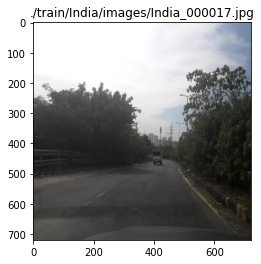

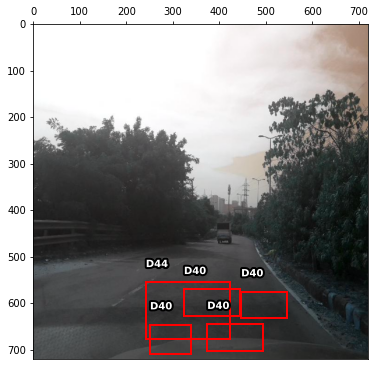



India_000018.jpg
./train/India/labels2/India_000018.txt ./train/India/images/India_000018.jpg
[]


India_000019.jpg
./train/India/labels2/India_000019.txt ./train/India/images/India_000019.jpg
[]


India_000022.jpg
./train/India/labels2/India_000022.txt ./train/India/images/India_000022.jpg
[]




'Done showing 5:15 images'

In [93]:


def show_preds2(imgspath, start = 0, end = 10, **kwargs):

    files= get_files_in_dir(path = imgspath, **kwargs)
    for file in files[start:end]:
        print(file)
        labelpath = imgspath.replace('images','labels2',1) + os.sep + file.replace('jpg','txt',1)
        imgpath = imgspath + os.sep + file
        print(labelpath, imgpath)
        with open(labelpath) as labelfile:
            lines = [line.rstrip() for line in labelfile.readlines()] 
            print(lines)
            if len(lines) > 0:
                
                img = cv2.imread(imgpath)
                color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                plt.imshow(color)
                plt.title(imgpath)
                pil_image = PIL.Image.open('./train/India/images/India_000005.jpg')
                imgwidth, imgheight = pil_image.size
                fig, ax = plt.subplots(figsize = (6,9))

                for label in lines:
                    
                    print('Label',label)
                    lb = label.split(' ')[0]
                    print('lb ', lb)
                    x, y, w, h = [float(i) for i in label.split(' ')[1:]] 
#                     print('dims pre', x, y, w, h)
#                     x *= imgwidth
#                     w *= imgwidth
#                     y *= imgheight
#                     h *= imgheight
#                     print('dims post', x, y, w, h)
                    x, y, w, h = [int(i) for i in [x, y, w, h]]
                    print(x, y, w, h)
                    ax.xaxis.tick_top()
                    ax.add_patch(patches.Rectangle((x,y),w,h, fill=False, edgecolor='red', lw=2))
                    ax.text(x,(y-50),str(lb),verticalalignment='top', color='white',fontsize=10,
                            weight='bold').set_path_effects([patheffects.Stroke(linewidth=4, foreground='black'), patheffects.Normal()])
#                 plt.show(img)
                ax.imshow(img)
                plt.pause(1)
                ax.cla()
        print('\n')
    
    return f'''Done showing {start}:{end} images'''
            
show_preds2(imgspath = './train/India/images', start = 5, end = 15, extension = 'jpg', show_folders = False)

### Takeaway: XML to TXT conversion pipeline functions as intended - good to proceed with model training

In [95]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 9758, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 9758 (delta 35), reused 31 (delta 27), pack-reused 9713
Receiving objects: 100% (9758/9758), 10.07 MiB | 6.41 MiB/s, done.
Resolving deltas: 100% (6779/6779), done.
/Users/Administrator/DS/IEEE-Big-Data-2020/yolov5


In [102]:
!pip install -r yolov5/requirements.txt

In [103]:
#after manually cutting and pasting India files > _009600 into val folder, check that no missing files in both train and val again 

#rechecking no missing files in either folder following conversion
images_not_in_labels, labels_not_in_images = check_img_labels_match(imgspath = './train/India/images', labelspath = './train/India/labels', imgsextension = 'jpg',
                                                                    labelsextension = 'txt', show_folders = False)
print('{} Image files', len(images_not_in_labels))
print('{} Label files', len(labels_not_in_images))

0.0 sec to complete
0.0 sec to complete
No duplicate image IDs
No duplicate label IDs
All specified image IDs found in labels folder
All specified label IDs found in images folder
1.5 sec to complete
{} Image files 0
{} Label files 0


In [104]:
images_not_in_labels, labels_not_in_images = check_img_labels_match(imgspath = './val/India/images', labelspath = './val/India/labels', imgsextension = 'jpg',
                                                                    labelsextension = 'txt', show_folders = False)
print('{} Image files', len(images_not_in_labels))
print('{} Label files', len(labels_not_in_images))

0.0 sec to complete
0.0 sec to complete
No duplicate image IDs
No duplicate label IDs
All specified image IDs found in labels folder
All specified label IDs found in images folder
0.0 sec to complete
{} Image files 0
{} Label files 0


In [106]:
def get_img_size(imgpath = './train/India/images/India_000005.jpg'):
    pil_image = PIL.Image.open(imgpath)
    imgwidth, imgheight = pil_image.size
    return imgwidth, imgheight


print(get_img_size(imgpath = './train/India/images/India_000005.jpg'))
print(get_img_size(imgpath = './train/India/images/India_000010.jpg'))
print(get_img_size(imgpath = './train/India/images/India_000014.jpg'))

(720, 720)
(720, 720)
(720, 720)


In [109]:
%cat ./yolov5/data/data_ieee.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license
# COCO 2017 dataset http://cocodataset.org
# Example usage: python train.py --data coco.yaml
# parent
# ├── yolov5
# └── datasets
#     └── coco  ← downloads here


# train and val datasets (image directory or *.txt file with image paths)
train: /train/India/images/
val: /val/India/images/

# number of classes
nc: 7

# class names
names: ['D00','D10','D20','D40','D43','D44','D50']


# Download script/URL (optional)
# download: |
#   from utils.general import download, Path

#   # Download labels
#   segments = False  # segment or box labels
#   dir = Path(yaml['path'])  # dataset root dir
#   url = 'https://github.com/ultralytics/yolov5/releases/download/v1.0/'
#   urls = [url + ('coco2017labels-segments.zip' if segments else 'coco2017labels.zip')]  # labels
#   download(urls, dir=dir.parent)

#   # Download data
#   urls = ['http://images.cocodataset.org/zips/train2017.zip',  # 19G, 118k images
#           'http://images.cocodataset.org/zips/

In [117]:
files= get_files_in_dir(path = './val/India/images', extension = 'jpg', show_folders = False)
print(len(files))

0.0 sec to complete
229


In [118]:
%pwd

'/Users/Administrator/DS/IEEE-Big-Data-2020'

### 10/30 - 11/3 Training on India images only

In [ ]:
!python yolov5/train.py --img 720 --cfg yolov5/models/yolov5s_ieee.yaml --hyp hyp.scratch.yaml --batch 16 --epochs 100 --data yolov5/data/data_ieee.yaml --weights yolov5/weights/yolov5s.pt --workers 24 --name yolo_rdd

train: weights=yolov5/weights/yolov5s.pt, cfg=yolov5/models/yolov5s_ieee.yaml, data=yolov5/data/data_ieee.yaml, hyp=hyp.scratch.yaml, epochs=100, batch_size=16, imgsz=720, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=24, project=yolov5/runs/train, name=yolo_rdd, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (Docker image), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t

In [ ]:
!python yolov5/train.py --img 720 --cfg yolov5/models/yolov5s_ieee.yaml --hyp hyp.scratch.yaml --batch 4 --epochs 50 --data yolov5/data/data_ieee.yaml --weights yolov5/weights/yolov5s.pt --workers 24 --name yolo_rdd

train: weights=yolov5/weights/yolov5s.pt, cfg=yolov5/models/yolov5s_ieee.yaml, data=yolov5/data/data_ieee.yaml, hyp=hyp.scratch.yaml, epochs=50, batch_size=4, imgsz=720, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=24, project=yolov5/runs/train, name=yolo_rdd, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (Docker image), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0

In [ ]:
!python yolov5/train.py --img 720 --cfg yolov5/models/yolov5s_ieee.yaml --hyp hyp.scratch.yaml --batch 4 --epochs 50 --data yolov5/data/data_ieee.yaml --weights \ 
yolov5/weights/yolov5s.pt --workers 24 --name \ yolo_rdd --resume yolov5/runs/train/yolo_rdd14/weights/best.pt 

train: weights=yolov5/weights/yolov5s.pt, cfg=yolov5/models/yolov5s_ieee.yaml, data=yolov5/data/data_ieee.yaml, hyp=hyp.scratch.yaml, epochs=50, batch_size=4, imgsz=720, rect=False, resume=yolov5/runs/train/yolo_rdd14/weights/best.pt, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=24, project=yolov5/runs/train, name=yolo_rdd, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (Docker image), for updates see https://github.com/ultralytics/yolov5
Resuming training from yolov5/runs/train/yolo_rdd14/weights/best.pt
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epoch

In [ ]:
#10/31
!python yolov5/train.py --img 720 --cfg yolov5/models/yolov5s_ieee.yaml --hyp hyp.scratch.yaml --batch 4 --epochs 50 --data yolov5/data/data_ieee.yaml --weights yolov5/weights/yolov5s.pt --name yolo_rdd --resume yolov5/runs/train/yolo_rdd14/weights/last.pt

train: weights=yolov5/weights/yolov5s.pt, cfg=yolov5/models/yolov5s_ieee.yaml, data=yolov5/data/data_ieee.yaml, hyp=hyp.scratch.yaml, epochs=50, batch_size=4, imgsz=720, rect=False, resume=yolov5/runs/train/yolo_rdd14/weights/last.pt, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=yolov5/runs/train, name=yolo_rdd, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (Docker image), for updates see https://github.com/ultralytics/yolov5
Resuming training from yolov5/runs/train/yolo_rdd14/weights/last.pt
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs

In [ ]:
#10/31
!python yolov5/train.py --img 720 --cfg yolov5/models/yolov5s_ieee.yaml --hyp hyp.scratch.yaml --batch 4 --epochs 50 --data yolov5/data/data_ieee.yaml --weights yolov5/weights/yolov5s.pt --name yolo_rdd --resume yolov5/runs/train/yolo_rdd14/weights/last.pt

train: weights=yolov5/weights/yolov5s.pt, cfg=yolov5/models/yolov5s_ieee.yaml, data=yolov5/data/data_ieee.yaml, hyp=hyp.scratch.yaml, epochs=50, batch_size=4, imgsz=720, rect=False, resume=yolov5/runs/train/yolo_rdd14/weights/last.pt, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=yolov5/runs/train, name=yolo_rdd, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (Docker image), for updates see https://github.com/ultralytics/yolov5
Resuming training from yolov5/runs/train/yolo_rdd14/weights/last.pt
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs

In [ ]:
#10/31
!python yolov5/train.py --img 720 --cfg yolov5/models/yolov5s_ieee.yaml --workers 2 --patience 20 --hyp hyp.scratch.yaml --batch 4 --epochs 50 --data yolov5/data/data_ieee.yaml --weights yolov5/weights/yolov5s.pt --name yolo_rdd --resume yolov5/runs/train/yolo_rdd14/weights/last.pt

train: weights=yolov5/weights/yolov5s.pt, cfg=yolov5/models/yolov5s_ieee.yaml, data=yolov5/data/data_ieee.yaml, hyp=hyp.scratch.yaml, epochs=50, batch_size=4, imgsz=720, rect=False, resume=yolov5/runs/train/yolo_rdd14/weights/last.pt, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=yolov5/runs/train, name=yolo_rdd, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=20, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (Docker image), for updates see https://github.com/ultralytics/yolov5
Resuming training from yolov5/runs/train/yolo_rdd14/weights/last.pt
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=

In [3]:
#10/31
!python yolov5/train.py --img 720 --cfg yolov5/models/yolov5s_ieee.yaml --workers 2 --patience 20 --hyp hyp.scratch.yaml --batch 4 --epochs 50 --data yolov5/data/data_ieee.yaml --weights yolov5/weights/yolov5s.pt --name yolo_rdd --resume yolov5/runs/train/yolo_rdd14/weights/last.pt

train: weights=yolov5/weights/yolov5s.pt, cfg=yolov5/models/yolov5s_ieee.yaml, data=yolov5/data/data_ieee.yaml, hyp=hyp.scratch.yaml, epochs=50, batch_size=4, imgsz=720, rect=False, resume=yolov5/runs/train/yolo_rdd14/weights/last.pt, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=yolov5/runs/train, name=yolo_rdd, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=20, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (Docker image), for updates see https://github.com/ultralytics/yolov5
Resuming training from yolov5/runs/train/yolo_rdd14/weights/last.pt
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=

Optimizer stripped from yolov5/runs/train/yolo_rdd14/weights/best.pt, 14.6MB

Validating yolov5/runs/train/yolo_rdd14/weights/best.pt...
Fusing layers... 
Model Summary: 213 layers, 7029004 parameters, 0 gradients
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.579      0.285      0.245      0.101
                 D00        229          1          1          0          0          0
                 D10        229          1          1          0    0.00905    0.00633
                 D20        229         30      0.372      0.395      0.256     0.0998
                 D40        229         12      0.146      0.417      0.253      0.134
                 D43        229         29      0.428      0.414      0.383      0.138
                 D44        229         84      0.526      0.333      0.319      0.115
                 D50        229         55      0.581      0.436      0.498      0.212
Results s

In [ ]:
!python yolov5/train.py --img 720 --cfg yolov5/models/yolov5s_ieee.yaml --hyp hyp.scratch.yaml --batch 4 --epochs 50 --data yolov5/data/data_ieee.yaml --weights yolov5/weights/yolov5s.pt --workers 24 --name yolo_rdd

In [ ]:
#11/1
!python yolov5/train.py --img 720 --cfg yolov5/models/yolov5s_ieee.yaml --workers 2 --patience 20 --hyp hyp.scratch.yaml --batch 6 --epochs 100 --data yolov5/data/data_ieee.yaml --weights yolov5/runs/train/yolo_rdd14/weights/last.pt --name yolo_rdd2

train: weights=yolov5/runs/train/yolo_rdd14/weights/last.pt, cfg=yolov5/models/yolov5s_ieee.yaml, data=yolov5/data/data_ieee.yaml, hyp=hyp.scratch.yaml, epochs=100, batch_size=6, imgsz=720, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=yolov5/runs/train, name=yolo_rdd2, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=20, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (Docker image), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, 

In [ ]:
#11/1
!python yolov5/train.py --img 720 --cfg yolov5/models/yolov5s_ieee.yaml --workers 2 --patience 20 --hyp hyp.scratch.yaml --batch 6 --epochs 100 --data yolov5/data/data_ieee.yaml --weights yolov5/runs/train/yolo_rdd22/weights/last.pt --name yolo_rdd2 --resume yolov5/runs/train/yolo_rdd22/weights/best.pt 

train: weights=yolov5/runs/train/yolo_rdd22/weights/last.pt, cfg=yolov5/models/yolov5s_ieee.yaml, data=yolov5/data/data_ieee.yaml, hyp=hyp.scratch.yaml, epochs=100, batch_size=6, imgsz=720, rect=False, resume=yolov5/runs/train/yolo_rdd22/weights/best.pt, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=yolov5/runs/train, name=yolo_rdd2, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=20, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (Docker image), for updates see https://github.com/ultralytics/yolov5
Resuming training from yolov5/runs/train/yolo_rdd22/weights/best.pt
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0


     Epoch   gpu_mem       box       obj       cls    labels  img_size
     36/99      2.3G   0.05082   0.01459   0.01269         0       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212       0.55      0.292      0.266     0.0995

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     37/99      2.3G    0.0509   0.01464   0.01361         1       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.614      0.253      0.286      0.108

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     38/99      2.3G   0.05042    0.0146   0.01229         0       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.394      0.355      0.283     0.0993

     Epoch   gpu_mem       box      

In [2]:
#11/1
!python yolov5/train.py --img 720 --cfg yolov5/models/yolov5s_ieee.yaml --workers 2 --patience 20 --hyp hyp.scratch.yaml --batch 6 --epochs 100 --data yolov5/data/data_ieee.yaml --weights yolov5/runs/train/yolo_rdd14/weights/last.pt --name yolo_rdd2 --resume yolov5/runs/train/yolo_rdd22/weights/best.pt 

train: weights=yolov5/runs/train/yolo_rdd14/weights/last.pt, cfg=yolov5/models/yolov5s_ieee.yaml, data=yolov5/data/data_ieee.yaml, hyp=hyp.scratch.yaml, epochs=100, batch_size=6, imgsz=720, rect=False, resume=yolov5/runs/train/yolo_rdd22/weights/best.pt, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=yolov5/runs/train, name=yolo_rdd2, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=20, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (Docker image), for updates see https://github.com/ultralytics/yolov5
Resuming training from yolov5/runs/train/yolo_rdd22/weights/best.pt
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0

     49/99      2.3G   0.04842   0.01432   0.01002         1       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.423      0.376      0.326      0.137

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     50/99      2.3G   0.04785   0.01451   0.01006         4       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.401      0.424      0.336      0.147

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     51/99      2.3G   0.04724   0.01404  0.009945         2       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.476      0.463      0.338      0.153

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     52/99      2.3G   0.04726   0.01


     Epoch   gpu_mem       box       obj       cls    labels  img_size
     75/99      2.3G   0.04305   0.01317  0.007039         0       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.565      0.541      0.442      0.165

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     76/99      2.3G   0.04298   0.01322   0.00717         1       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.463      0.567      0.348       0.15

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     77/99      2.3G   0.04268   0.01311  0.006723         0       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.503      0.557      0.384      0.166

     Epoch   gpu_mem       box      

Fusing layers... 
Model Summary: 213 layers, 7029004 parameters, 0 gradients
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.455       0.64      0.459      0.261
                 D00        229          1          1          0          0          0
                 D10        229          1      0.988          1      0.995      0.895
                 D20        229         30      0.281      0.767       0.47      0.172
                 D40        229         12      0.178       0.75      0.378      0.151
                 D43        229         29      0.182      0.655      0.414      0.191
                 D44        229         84      0.227      0.548      0.367      0.116
                 D50        229         55      0.328      0.764      0.588      0.298
Results saved to yolov5/runs/train/yolo_rdd22


In [3]:
#11/3
!python yolov5/train.py --img 720 --cfg yolov5/models/yolov5s_ieee.yaml --workers 2 --patience 20 --hyp hyp.scratch.yaml --batch 16 --epochs 300 --data yolov5/data/data_ieee.yaml --weights yolov5/runs/train/yolo_rdd22/weights/best.pt --name yolo_rdd_3 

train: weights=yolov5/runs/train/yolo_rdd22/weights/best.pt, cfg=yolov5/models/yolov5s_ieee.yaml, data=yolov5/data/data_ieee.yaml, hyp=hyp.scratch.yaml, epochs=300, batch_size=16, imgsz=720, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=yolov5/runs/train, name=yolo_rdd_3, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=20, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (Docker image), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0

     9/299     5.96G   0.05049   0.01427   0.01044         5       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.532      0.294      0.233     0.0825

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    10/299     5.96G   0.04955   0.01428   0.01036         6       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.522      0.296      0.253     0.0841

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    11/299     5.96G   0.04938    0.0142   0.01046         6       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.536      0.273      0.199     0.0705

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    12/299     5.96G   0.04971   0.01

In [4]:
!python yolov5/train.py --img 720 --cfg yolov5/models/yolov5s_ieee.yaml --workers 2 --patience 20 --hyp hyp.scratch.yaml --batch 16 --epochs 300 --data yolov5/data/data_ieee.yaml --weights yolov5/runs/train/yolo_rdd22/weights/best.pt --name yolo_rdd_3 

train: weights=yolov5/runs/train/yolo_rdd22/weights/best.pt, cfg=yolov5/models/yolov5s_ieee.yaml, data=yolov5/data/data_ieee.yaml, hyp=hyp.scratch.yaml, epochs=300, batch_size=16, imgsz=720, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=yolov5/runs/train, name=yolo_rdd_3, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=20, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (Docker image), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0

     9/299     5.96G   0.05027   0.01426   0.01049         5       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.335       0.31      0.218     0.0808

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    10/299     5.96G   0.04965   0.01431   0.01069         6       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.365      0.346      0.219     0.0766

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    11/299     5.96G    0.0491   0.01411   0.01039         6       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.512      0.298      0.213     0.0778

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    12/299     5.96G   0.04954   0.01

In [ ]:
#batch size 64 - memory runtime error
#batch size 32 - memory runtime error



In [7]:
!python yolov5/train.py --img 720 --cfg yolov5/models/yolov5s_ieee.yaml --workers 2 --patience 20 --hyp hyp.scratch.yaml --batch 24 --epochs 300 --data yolov5/data/data_ieee.yaml --weights yolov5/runs/train/yolo_rdd22/weights/best.pt --name yolo_rdd_3 

train: weights=yolov5/runs/train/yolo_rdd22/weights/best.pt, cfg=yolov5/models/yolov5s_ieee.yaml, data=yolov5/data/data_ieee.yaml, hyp=hyp.scratch.yaml, epochs=300, batch_size=24, imgsz=720, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=yolov5/runs/train, name=yolo_rdd_3, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=20, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (Docker image), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0

     9/299      8.8G   0.04991    0.0142    0.0102        13       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.375      0.333      0.249     0.0863

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    10/299      8.8G    0.0493   0.01424   0.01007        21       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.551      0.272      0.248     0.0909

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    11/299      8.8G   0.04916   0.01401   0.01004        21       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.538      0.315      0.229     0.0862

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    12/299      8.8G   0.04906   0.01

In [8]:
!python yolov5/train.py --img 720 --cfg yolov5/models/yolov5s_ieee.yaml --workers 2 --patience 20 --hyp hyp.scratch.yaml --batch 30 --epochs 300 --data yolov5/data/data_ieee.yaml --weights yolov5/weights/yolov5s.pt --name yolo_rdd_24_ 

train: weights=yolov5/weights/yolov5s.pt, cfg=yolov5/models/yolov5s_ieee.yaml, data=yolov5/data/data_ieee.yaml, hyp=hyp.scratch.yaml, epochs=300, batch_size=30, imgsz=720, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=yolov5/runs/train, name=yolo_rdd_24_, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=20, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (Docker image), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.564      0.172      0.079     0.0185

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    10/299     10.9G   0.06133   0.01629   0.02246         8       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.551      0.186     0.0949     0.0248

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    11/299     10.9G   0.06155   0.01618   0.02184        13       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.441      0.204       0.12     0.0364

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    12/299     10.9G   0.06074    0.0158   0.02127         9       736: 100%|█| 
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    35/299     10.9G   0.05481   0.01509   0.01427        14       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.582      0.214      0.232     0.0907

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    36/299     10.9G   0.05428   0.01483   0.01443         3       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.605      0.239      0.229     0.0755

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    37/299     10.9G   0.05422   0.01485    0.0144         8       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.553      0.256      0.204     0.0722

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.619      0.309      0.332      0.124

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    61/299     10.9G   0.05085   0.01433   0.01078         8       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.688      0.288      0.346      0.129

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    62/299     10.9G   0.05055   0.01445   0.01067        10       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.617      0.297      0.319      0.124

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    63/299     10.9G   0.05033   0.01423   0.01028        13       736: 100%|█| 
               Class     Images     L

In [10]:
!python yolov5/train.py --img 720 --cfg yolov5/models/yolov5s_ieee.yaml --workers 2 --patience 30 --hyp hyp.scratch.yaml --batch 36 --epochs 300 --data yolov5/data/data_ieee.yaml --weights yolov5/runs/train/yolo_rdd_24_/weights/best.pt  --name yolo_rdd_36_ 

train: weights=yolov5/runs/train/yolo_rdd_24_/weights/best.pt, cfg=yolov5/models/yolov5s_ieee.yaml, data=yolov5/data/data_ieee.yaml, hyp=hyp.scratch.yaml, epochs=300, batch_size=36, imgsz=720, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=2, project=yolov5/runs/train, name=yolo_rdd_36_, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=30, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (Docker image), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj

     9/299     12.9G   0.05175   0.01447   0.01145        36       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.494      0.295      0.216     0.0687

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    10/299     12.9G   0.05124    0.0147   0.01118        46       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.579      0.237      0.228     0.0885

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    11/299     12.9G   0.05115   0.01449    0.0113        48       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.538      0.306      0.223     0.0774

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    12/299     12.9G   0.05098   0.01


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    35/299     12.9G    0.0487   0.01377  0.009231        34       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.541      0.304      0.251      0.101

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    36/299     12.9G    0.0485   0.01388  0.009354        35       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.632      0.322      0.291       0.12

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    37/299     12.9G   0.04866   0.01379   0.00927        44       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.566      0.321      0.272      0.105

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.602      0.359      0.405      0.126

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    61/299     12.9G   0.04603   0.01329   0.00758        26       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.619      0.382      0.368      0.131

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    62/299     12.9G   0.04627    0.0134  0.007719        37       736: 100%|█| 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        229        212      0.587      0.362      0.307      0.128

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    63/299     12.9G   0.04595   0.01334  0.008157        44       736: 100%|█| 
               Class     Images     L

### 11/3 Training on all dataset observations - not just India

In [ ]:
!python yolov5/train.py --img 720 --cfg yolov5/models/yolov5s_ieee.yaml --workers 2 --patience 30 --hyp hyp.scratch.yaml --batch 36 --epochs 300 --data yolov5/data/data_ieee.yaml --weights yolov5/runs/train/yolo_rdd_24_/weights/best.pt  --name yolo_rdd_36_ 

In [ ]:
!python yolov5/train.py --img 720 --cfg yolov5/models/yolov5s_ieee.yaml --hyp hyp.scratch.yaml --batch 5 --epochs 100 --data yolov5/data/data_ieee.yaml --weights yolov5/weights/yolov5s.pt --workers 24 --name \
yolo_rdd 

### 10/31 & 11/1 - Detect

In [4]:
#11/1
!python ./yolov5/detect.py --weights ./yolov5/runs/train/yolo_rdd14/weights/best.pt --img 720 --source yolov5/test_japan

detect: weights=['./yolov5/runs/train/yolo_rdd14/weights/best.pt'], source=yolov5/test_japan, imgsz=[720, 720], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)

Fusing layers... 
Model Summary: 213 layers, 7029004 parameters, 0 gradients
image 1/19 /Users/Administrator/DS/IEEE-Big-Data-2020/yolov5/test_japan/Japan_000000.jpg: 736x736 Done. (0.007s)
image 2/19 /Users/Administrator/DS/IEEE-Big-Data-2020/yolov5/test_japan/Japan_000001.jpg: 736x736 Done. (0.017s)
image 3/19 /Users/Administrator/DS/IEEE-Big-Data-2020/yolov5/test_japan/Japan_000002.jpg: 736x736 Done. (0.019s)
image 4/19 /Users/Administrator/

In [9]:
!python ./yolov5/detect.py --weights ./yolov5/runs/train/yolo_rdd14/weights/last.pt --img 720 --source ./yolov5/train/Japan/images/Japan_000000.jpg

detect: weights=['./yolov5/runs/train/yolo_rdd14/weights/last.pt'], source=./yolov5/train/Japan/images/Japan_000000.jpg, imgsz=[720, 720], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)

Fusing layers... 
Model Summary: 213 layers, 7029004 parameters, 0 gradients
image 1/1 /Users/Administrator/DS/IEEE-Big-Data-2020/yolov5/train/Japan/images/Japan_000000.jpg: 736x736 Done. (0.016s)
Speed: 0.8ms pre-process, 16.3ms inference, 0.3ms NMS per image at shape (1, 3, 736, 736)
Results saved to yolov5/runs/detect/exp9


In [12]:
#works
!python ./yolov5/detect.py --weights ./yolov5/runs/train/yolo_rdd14/weights/last.pt --img 720 --source ./yolov5/test_japan

detect: weights=['./yolov5/runs/train/yolo_rdd14/weights/last.pt'], source=./yolov5/test_japan, imgsz=[720, 720], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)

Fusing layers... 
Model Summary: 213 layers, 7029004 parameters, 0 gradients
image 1/19 /Users/Administrator/DS/IEEE-Big-Data-2020/yolov5/test_japan/Japan_000000.jpg: 736x736 Done. (0.016s)
image 2/19 /Users/Administrator/DS/IEEE-Big-Data-2020/yolov5/test_japan/Japan_000001.jpg: 736x736 Done. (0.019s)
image 3/19 /Users/Administrator/DS/IEEE-Big-Data-2020/yolov5/test_japan/Japan_000002.jpg: 736x736 Done. (0.017s)
image 4/19 /Users/Administrato

In [13]:
!python ./yolov5/detect.py --weights ./yolov5/runs/train/yolo_rdd14/weights/best.pt --img 720 --source ./yolov5/test_japan

detect: weights=['./yolov5/runs/train/yolo_rdd14/weights/best.pt'], source=./yolov5/test_japan, imgsz=[720, 720], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)

Traceback (most recent call last):
  File "./yolov5/detect.py", line 307, in <module>
    main(opt)
  File "./yolov5/detect.py", line 302, in main
    run(**vars(opt))
  File "/opt/conda/lib/python3.8/site-packages/torch/autograd/grad_mode.py", line 28, in decorate_context
    return func(*args, **kwargs)
  File "./yolov5/detect.py", line 82, in run
    model = torch.jit.load(w) if 'torchscript' in w else attempt_load(weights, map_location=de

In [10]:
!python ./yolov5/detect.py --weights ./yolov5/weights/yolov5s.pt --img 720 --source yolov5/test_japan

detect: weights=['./yolov5/weights/yolov5s.pt'], source=yolov5/test_japan, imgsz=[720, 720], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)

Fusing layers... 
Model Summary: 232 layers, 7459581 parameters, 0 gradients
image 1/19 /Users/Administrator/DS/IEEE-Big-Data-2020/yolov5/test_japan/Japan_000000.jpg: 736x736 4 cars, Done. (0.020s)
image 2/19 /Users/Administrator/DS/IEEE-Big-Data-2020/yolov5/test_japan/Japan_000001.jpg: 736x736 4 cars, 1 truck, Done. (0.021s)
image 3/19 /Users/Administrator/DS/IEEE-Big-Data-2020/yolov5/test_japan/Japan_000002.jpg: 736x736 3 persons, 1 bicycle, 3 traffic lights, 2

In [7]:
!python ./yolov5/detect.py --weights ./yolov5/weights/jpvl54.pt --img 720 --source yolov5/train/Japan/images/Japan_000000.jpg 

detect: weights=['./yolov5/weights/jpvl54.pt'], source=yolov5/train/Japan/images/Japan_000000.jpg, imgsz=[720, 720], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-35-ga4fece8 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)

Fusing layers... 
Model Summary: 368 layers, 49841004 parameters, 0 gradients
Traceback (most recent call last):
  File "./yolov5/detect.py", line 307, in <module>
    main(opt)
  File "./yolov5/detect.py", line 302, in main
    run(**vars(opt))
  File "/opt/conda/lib/python3.8/site-packages/torch/autograd/grad_mode.py", line 28, in decorate_context
    return func(*args, **kwargs)
  File "./yolov5/detect.py", line 133, in run
    model(to

In [30]:
!ls -a

 .
 ..
 .git
 .ipynb_checkpoints
"0.11.0'"
"0.8.1'"
 Annotations
 Check_Images_Annotations.ipynb
 JPEGImages
 LICENSE
 README.md
 Submission.ipynb
 Train_YOLO_Model_Mushroom.ipynb
 YOLOv4_Model_Load_Fusing_Errors.xlsx
 YOLOv5_Training_India_100_Epoch.ipynb
 augment.py
 convert_annotations.py
 convert_xml_to_txt.py
 darknet
 ensemble1
 ensemble2
 gpu
 models
 test.txt
 test1
 test2
 test2.txt
 train
 train.txt
 train_aug.txt
 train_aug_annotations.txt
 val
 yolo_416.cfg
 yolo_608.cfg
 yolov5
'~$YOLOv4_Model_Load_Fusing_Errors.xlsx'


In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)
model.load_state_dict(torch.load('./yolov5/runs/train/yolo_rdd14/weights/last.pt'), strict=False)['model'].state_dict()

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


YOLOv5 🚀 2021-10-30 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)



  0%|          | 0.00/14.0M [00:00<?, ?B/s]

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


TypeError: tuple indices must be integers or slices, not str

In [33]:
model.load_state_dict(torch.load('./yolov5/weights/yolov5s.pt'), strict=False)['model'].state_dict()


TypeError: tuple indices must be integers or slices, not str

In [34]:
!pip freeze

absl-py==0.13.0
alabaster==0.7.12
apex==0.1
appdirs==1.4.4
argon2-cffi==21.1.0
asgiref==3.4.1
attrs==21.2.0
audioread==2.1.9
Babel==2.9.1
backcall @ file:///home/conda/feedstock_root/build_artifacts/backcall_1592338393461/work
backports.functools-lru-cache @ file:///home/conda/feedstock_root/build_artifacts/backports.functools_lru_cache_1618230623929/work
beautifulsoup4 @ file:///home/conda/feedstock_root/build_artifacts/beautifulsoup4_1601745390275/work
bleach==4.1.0
blis @ file:///home/conda/feedstock_root/build_artifacts/cython-blis_1607338147605/work
brotlipy==0.7.0
cachetools==4.2.2
catalogue @ file:///home/conda/feedstock_root/build_artifacts/catalogue_1629144899387/work
certifi==2021.5.30
cffi @ file:///home/conda/feedstock_root/build_artifacts/cffi_1625835293160/work
chardet @ file:///home/conda/feedstock_root/build_artifacts/chardet_1610093490430/work
charset-normalizer @ file:///home/conda/feedstock_root/build_artifacts/charset-normalizer_1626371162869/work
click==7.1.2
codec

In [29]:
import torch
from PIL import Image


def copy_attr(a, b, include=(), exclude=()):
    # Copy attributes from b to a, options to only include [...] and to exclude [...]
    for k, v in b.__dict__.items():
        if (len(include) and k not in include) or k.startswith('_') or k in exclude:
            continue
        else:
            setattr(a, k, v)

# my network so slow that I can't download your model above successfully :(
# so I just use ultralytics's pretrained model here 
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)
model.load_state_dict(torch.load('./yolov5/runs/train/yolo_rdd14/weights/last.pt'), strict=False)['model'].state_dict()

print(checkpoint_)

# model.load_state_dict(checkpoint_.state_dict())

# copy_attr(model, checkpoint_, include=('yaml', 'nc', 'hyp', 'names', 'stride'), exclude=())

# model = model.fuse().autoshape()

# img = Image.open('./notebooks/assets/zidane.jpg')
# output = model(img)

# print(f'prediction: {output.pred}')

TypeError: tuple indices must be integers or slices, not str

In [ ]:
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s', classes=6)
# model.load_state_dict(torch.load('...')['model'].state_dict())

# model = model.fuse() #.autoshape()


In [15]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)
model.load_state_dict(torch.load('./yolov5/runs/train/yolo_rdd14/weights/last.pt'), strict=False)['model'].state_dict()



Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2021-10-28 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)



  0%|          | 0.00/14.0M [00:00<?, ?B/s]

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


TypeError: tuple indices must be integers or slices, not str

In [28]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True).autoshape()
print(model)
model.load_state_dict(torch.load('./yolov5/runs/train/yolo_rdd14/weights/last.pt')['model'].state_dict())
model = model.fuse()

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2021-10-27 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)



  0%|          | 0.00/14.0M [00:00<?, ?B/s]

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


AutoShape already enabled, skipping... 


AutoShape(
  (model): Model(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (co

RuntimeError: Error(s) in loading state_dict for AutoShape:
	Missing key(s) in state_dict: "model.model.0.conv.weight", "model.model.0.conv.bias", "model.model.1.conv.weight", "model.model.1.conv.bias", "model.model.2.cv1.conv.weight", "model.model.2.cv1.conv.bias", "model.model.2.cv2.conv.weight", "model.model.2.cv2.conv.bias", "model.model.2.cv3.conv.weight", "model.model.2.cv3.conv.bias", "model.model.2.m.0.cv1.conv.weight", "model.model.2.m.0.cv1.conv.bias", "model.model.2.m.0.cv2.conv.weight", "model.model.2.m.0.cv2.conv.bias", "model.model.3.conv.weight", "model.model.3.conv.bias", "model.model.4.cv1.conv.weight", "model.model.4.cv1.conv.bias", "model.model.4.cv2.conv.weight", "model.model.4.cv2.conv.bias", "model.model.4.cv3.conv.weight", "model.model.4.cv3.conv.bias", "model.model.4.m.0.cv1.conv.weight", "model.model.4.m.0.cv1.conv.bias", "model.model.4.m.0.cv2.conv.weight", "model.model.4.m.0.cv2.conv.bias", "model.model.4.m.1.cv1.conv.weight", "model.model.4.m.1.cv1.conv.bias", "model.model.4.m.1.cv2.conv.weight", "model.model.4.m.1.cv2.conv.bias", "model.model.5.conv.weight", "model.model.5.conv.bias", "model.model.6.cv1.conv.weight", "model.model.6.cv1.conv.bias", "model.model.6.cv2.conv.weight", "model.model.6.cv2.conv.bias", "model.model.6.cv3.conv.weight", "model.model.6.cv3.conv.bias", "model.model.6.m.0.cv1.conv.weight", "model.model.6.m.0.cv1.conv.bias", "model.model.6.m.0.cv2.conv.weight", "model.model.6.m.0.cv2.conv.bias", "model.model.6.m.1.cv1.conv.weight", "model.model.6.m.1.cv1.conv.bias", "model.model.6.m.1.cv2.conv.weight", "model.model.6.m.1.cv2.conv.bias", "model.model.6.m.2.cv1.conv.weight", "model.model.6.m.2.cv1.conv.bias", "model.model.6.m.2.cv2.conv.weight", "model.model.6.m.2.cv2.conv.bias", "model.model.7.conv.weight", "model.model.7.conv.bias", "model.model.8.cv1.conv.weight", "model.model.8.cv1.conv.bias", "model.model.8.cv2.conv.weight", "model.model.8.cv2.conv.bias", "model.model.8.cv3.conv.weight", "model.model.8.cv3.conv.bias", "model.model.8.m.0.cv1.conv.weight", "model.model.8.m.0.cv1.conv.bias", "model.model.8.m.0.cv2.conv.weight", "model.model.8.m.0.cv2.conv.bias", "model.model.9.cv1.conv.weight", "model.model.9.cv1.conv.bias", "model.model.9.cv2.conv.weight", "model.model.9.cv2.conv.bias", "model.model.10.conv.weight", "model.model.10.conv.bias", "model.model.13.cv1.conv.weight", "model.model.13.cv1.conv.bias", "model.model.13.cv2.conv.weight", "model.model.13.cv2.conv.bias", "model.model.13.cv3.conv.weight", "model.model.13.cv3.conv.bias", "model.model.13.m.0.cv1.conv.weight", "model.model.13.m.0.cv1.conv.bias", "model.model.13.m.0.cv2.conv.weight", "model.model.13.m.0.cv2.conv.bias", "model.model.14.conv.weight", "model.model.14.conv.bias", "model.model.17.cv1.conv.weight", "model.model.17.cv1.conv.bias", "model.model.17.cv2.conv.weight", "model.model.17.cv2.conv.bias", "model.model.17.cv3.conv.weight", "model.model.17.cv3.conv.bias", "model.model.17.m.0.cv1.conv.weight", "model.model.17.m.0.cv1.conv.bias", "model.model.17.m.0.cv2.conv.weight", "model.model.17.m.0.cv2.conv.bias", "model.model.18.conv.weight", "model.model.18.conv.bias", "model.model.20.cv1.conv.weight", "model.model.20.cv1.conv.bias", "model.model.20.cv2.conv.weight", "model.model.20.cv2.conv.bias", "model.model.20.cv3.conv.weight", "model.model.20.cv3.conv.bias", "model.model.20.m.0.cv1.conv.weight", "model.model.20.m.0.cv1.conv.bias", "model.model.20.m.0.cv2.conv.weight", "model.model.20.m.0.cv2.conv.bias", "model.model.21.conv.weight", "model.model.21.conv.bias", "model.model.23.cv1.conv.weight", "model.model.23.cv1.conv.bias", "model.model.23.cv2.conv.weight", "model.model.23.cv2.conv.bias", "model.model.23.cv3.conv.weight", "model.model.23.cv3.conv.bias", "model.model.23.m.0.cv1.conv.weight", "model.model.23.m.0.cv1.conv.bias", "model.model.23.m.0.cv2.conv.weight", "model.model.23.m.0.cv2.conv.bias", "model.model.24.anchors", "model.model.24.m.0.weight", "model.model.24.m.0.bias", "model.model.24.m.1.weight", "model.model.24.m.1.bias", "model.model.24.m.2.weight", "model.model.24.m.2.bias". 
	Unexpected key(s) in state_dict: "model.0.conv.weight", "model.0.bn.weight", "model.0.bn.bias", "model.0.bn.running_mean", "model.0.bn.running_var", "model.0.bn.num_batches_tracked", "model.1.conv.weight", "model.1.bn.weight", "model.1.bn.bias", "model.1.bn.running_mean", "model.1.bn.running_var", "model.1.bn.num_batches_tracked", "model.2.cv1.conv.weight", "model.2.cv1.bn.weight", "model.2.cv1.bn.bias", "model.2.cv1.bn.running_mean", "model.2.cv1.bn.running_var", "model.2.cv1.bn.num_batches_tracked", "model.2.cv2.conv.weight", "model.2.cv2.bn.weight", "model.2.cv2.bn.bias", "model.2.cv2.bn.running_mean", "model.2.cv2.bn.running_var", "model.2.cv2.bn.num_batches_tracked", "model.2.cv3.conv.weight", "model.2.cv3.bn.weight", "model.2.cv3.bn.bias", "model.2.cv3.bn.running_mean", "model.2.cv3.bn.running_var", "model.2.cv3.bn.num_batches_tracked", "model.2.m.0.cv1.conv.weight", "model.2.m.0.cv1.bn.weight", "model.2.m.0.cv1.bn.bias", "model.2.m.0.cv1.bn.running_mean", "model.2.m.0.cv1.bn.running_var", "model.2.m.0.cv1.bn.num_batches_tracked", "model.2.m.0.cv2.conv.weight", "model.2.m.0.cv2.bn.weight", "model.2.m.0.cv2.bn.bias", "model.2.m.0.cv2.bn.running_mean", "model.2.m.0.cv2.bn.running_var", "model.2.m.0.cv2.bn.num_batches_tracked", "model.3.conv.weight", "model.3.bn.weight", "model.3.bn.bias", "model.3.bn.running_mean", "model.3.bn.running_var", "model.3.bn.num_batches_tracked", "model.4.cv1.conv.weight", "model.4.cv1.bn.weight", "model.4.cv1.bn.bias", "model.4.cv1.bn.running_mean", "model.4.cv1.bn.running_var", "model.4.cv1.bn.num_batches_tracked", "model.4.cv2.conv.weight", "model.4.cv2.bn.weight", "model.4.cv2.bn.bias", "model.4.cv2.bn.running_mean", "model.4.cv2.bn.running_var", "model.4.cv2.bn.num_batches_tracked", "model.4.cv3.conv.weight", "model.4.cv3.bn.weight", "model.4.cv3.bn.bias", "model.4.cv3.bn.running_mean", "model.4.cv3.bn.running_var", "model.4.cv3.bn.num_batches_tracked", "model.4.m.0.cv1.conv.weight", "model.4.m.0.cv1.bn.weight", "model.4.m.0.cv1.bn.bias", "model.4.m.0.cv1.bn.running_mean", "model.4.m.0.cv1.bn.running_var", "model.4.m.0.cv1.bn.num_batches_tracked", "model.4.m.0.cv2.conv.weight", "model.4.m.0.cv2.bn.weight", "model.4.m.0.cv2.bn.bias", "model.4.m.0.cv2.bn.running_mean", "model.4.m.0.cv2.bn.running_var", "model.4.m.0.cv2.bn.num_batches_tracked", "model.4.m.1.cv1.conv.weight", "model.4.m.1.cv1.bn.weight", "model.4.m.1.cv1.bn.bias", "model.4.m.1.cv1.bn.running_mean", "model.4.m.1.cv1.bn.running_var", "model.4.m.1.cv1.bn.num_batches_tracked", "model.4.m.1.cv2.conv.weight", "model.4.m.1.cv2.bn.weight", "model.4.m.1.cv2.bn.bias", "model.4.m.1.cv2.bn.running_mean", "model.4.m.1.cv2.bn.running_var", "model.4.m.1.cv2.bn.num_batches_tracked", "model.5.conv.weight", "model.5.bn.weight", "model.5.bn.bias", "model.5.bn.running_mean", "model.5.bn.running_var", "model.5.bn.num_batches_tracked", "model.6.cv1.conv.weight", "model.6.cv1.bn.weight", "model.6.cv1.bn.bias", "model.6.cv1.bn.running_mean", "model.6.cv1.bn.running_var", "model.6.cv1.bn.num_batches_tracked", "model.6.cv2.conv.weight", "model.6.cv2.bn.weight", "model.6.cv2.bn.bias", "model.6.cv2.bn.running_mean", "model.6.cv2.bn.running_var", "model.6.cv2.bn.num_batches_tracked", "model.6.cv3.conv.weight", "model.6.cv3.bn.weight", "model.6.cv3.bn.bias", "model.6.cv3.bn.running_mean", "model.6.cv3.bn.running_var", "model.6.cv3.bn.num_batches_tracked", "model.6.m.0.cv1.conv.weight", "model.6.m.0.cv1.bn.weight", "model.6.m.0.cv1.bn.bias", "model.6.m.0.cv1.bn.running_mean", "model.6.m.0.cv1.bn.running_var", "model.6.m.0.cv1.bn.num_batches_tracked", "model.6.m.0.cv2.conv.weight", "model.6.m.0.cv2.bn.weight", "model.6.m.0.cv2.bn.bias", "model.6.m.0.cv2.bn.running_mean", "model.6.m.0.cv2.bn.running_var", "model.6.m.0.cv2.bn.num_batches_tracked", "model.6.m.1.cv1.conv.weight", "model.6.m.1.cv1.bn.weight", "model.6.m.1.cv1.bn.bias", "model.6.m.1.cv1.bn.running_mean", "model.6.m.1.cv1.bn.running_var", "model.6.m.1.cv1.bn.num_batches_tracked", "model.6.m.1.cv2.conv.weight", "model.6.m.1.cv2.bn.weight", "model.6.m.1.cv2.bn.bias", "model.6.m.1.cv2.bn.running_mean", "model.6.m.1.cv2.bn.running_var", "model.6.m.1.cv2.bn.num_batches_tracked", "model.6.m.2.cv1.conv.weight", "model.6.m.2.cv1.bn.weight", "model.6.m.2.cv1.bn.bias", "model.6.m.2.cv1.bn.running_mean", "model.6.m.2.cv1.bn.running_var", "model.6.m.2.cv1.bn.num_batches_tracked", "model.6.m.2.cv2.conv.weight", "model.6.m.2.cv2.bn.weight", "model.6.m.2.cv2.bn.bias", "model.6.m.2.cv2.bn.running_mean", "model.6.m.2.cv2.bn.running_var", "model.6.m.2.cv2.bn.num_batches_tracked", "model.7.conv.weight", "model.7.bn.weight", "model.7.bn.bias", "model.7.bn.running_mean", "model.7.bn.running_var", "model.7.bn.num_batches_tracked", "model.8.cv1.conv.weight", "model.8.cv1.bn.weight", "model.8.cv1.bn.bias", "model.8.cv1.bn.running_mean", "model.8.cv1.bn.running_var", "model.8.cv1.bn.num_batches_tracked", "model.8.cv2.conv.weight", "model.8.cv2.bn.weight", "model.8.cv2.bn.bias", "model.8.cv2.bn.running_mean", "model.8.cv2.bn.running_var", "model.8.cv2.bn.num_batches_tracked", "model.8.cv3.conv.weight", "model.8.cv3.bn.weight", "model.8.cv3.bn.bias", "model.8.cv3.bn.running_mean", "model.8.cv3.bn.running_var", "model.8.cv3.bn.num_batches_tracked", "model.8.m.0.cv1.conv.weight", "model.8.m.0.cv1.bn.weight", "model.8.m.0.cv1.bn.bias", "model.8.m.0.cv1.bn.running_mean", "model.8.m.0.cv1.bn.running_var", "model.8.m.0.cv1.bn.num_batches_tracked", "model.8.m.0.cv2.conv.weight", "model.8.m.0.cv2.bn.weight", "model.8.m.0.cv2.bn.bias", "model.8.m.0.cv2.bn.running_mean", "model.8.m.0.cv2.bn.running_var", "model.8.m.0.cv2.bn.num_batches_tracked", "model.9.cv1.conv.weight", "model.9.cv1.bn.weight", "model.9.cv1.bn.bias", "model.9.cv1.bn.running_mean", "model.9.cv1.bn.running_var", "model.9.cv1.bn.num_batches_tracked", "model.9.cv2.conv.weight", "model.9.cv2.bn.weight", "model.9.cv2.bn.bias", "model.9.cv2.bn.running_mean", "model.9.cv2.bn.running_var", "model.9.cv2.bn.num_batches_tracked", "model.10.conv.weight", "model.10.bn.weight", "model.10.bn.bias", "model.10.bn.running_mean", "model.10.bn.running_var", "model.10.bn.num_batches_tracked", "model.13.cv1.conv.weight", "model.13.cv1.bn.weight", "model.13.cv1.bn.bias", "model.13.cv1.bn.running_mean", "model.13.cv1.bn.running_var", "model.13.cv1.bn.num_batches_tracked", "model.13.cv2.conv.weight", "model.13.cv2.bn.weight", "model.13.cv2.bn.bias", "model.13.cv2.bn.running_mean", "model.13.cv2.bn.running_var", "model.13.cv2.bn.num_batches_tracked", "model.13.cv3.conv.weight", "model.13.cv3.bn.weight", "model.13.cv3.bn.bias", "model.13.cv3.bn.running_mean", "model.13.cv3.bn.running_var", "model.13.cv3.bn.num_batches_tracked", "model.13.m.0.cv1.conv.weight", "model.13.m.0.cv1.bn.weight", "model.13.m.0.cv1.bn.bias", "model.13.m.0.cv1.bn.running_mean", "model.13.m.0.cv1.bn.running_var", "model.13.m.0.cv1.bn.num_batches_tracked", "model.13.m.0.cv2.conv.weight", "model.13.m.0.cv2.bn.weight", "model.13.m.0.cv2.bn.bias", "model.13.m.0.cv2.bn.running_mean", "model.13.m.0.cv2.bn.running_var", "model.13.m.0.cv2.bn.num_batches_tracked", "model.14.conv.weight", "model.14.bn.weight", "model.14.bn.bias", "model.14.bn.running_mean", "model.14.bn.running_var", "model.14.bn.num_batches_tracked", "model.17.cv1.conv.weight", "model.17.cv1.bn.weight", "model.17.cv1.bn.bias", "model.17.cv1.bn.running_mean", "model.17.cv1.bn.running_var", "model.17.cv1.bn.num_batches_tracked", "model.17.cv2.conv.weight", "model.17.cv2.bn.weight", "model.17.cv2.bn.bias", "model.17.cv2.bn.running_mean", "model.17.cv2.bn.running_var", "model.17.cv2.bn.num_batches_tracked", "model.17.cv3.conv.weight", "model.17.cv3.bn.weight", "model.17.cv3.bn.bias", "model.17.cv3.bn.running_mean", "model.17.cv3.bn.running_var", "model.17.cv3.bn.num_batches_tracked", "model.17.m.0.cv1.conv.weight", "model.17.m.0.cv1.bn.weight", "model.17.m.0.cv1.bn.bias", "model.17.m.0.cv1.bn.running_mean", "model.17.m.0.cv1.bn.running_var", "model.17.m.0.cv1.bn.num_batches_tracked", "model.17.m.0.cv2.conv.weight", "model.17.m.0.cv2.bn.weight", "model.17.m.0.cv2.bn.bias", "model.17.m.0.cv2.bn.running_mean", "model.17.m.0.cv2.bn.running_var", "model.17.m.0.cv2.bn.num_batches_tracked", "model.18.conv.weight", "model.18.bn.weight", "model.18.bn.bias", "model.18.bn.running_mean", "model.18.bn.running_var", "model.18.bn.num_batches_tracked", "model.20.cv1.conv.weight", "model.20.cv1.bn.weight", "model.20.cv1.bn.bias", "model.20.cv1.bn.running_mean", "model.20.cv1.bn.running_var", "model.20.cv1.bn.num_batches_tracked", "model.20.cv2.conv.weight", "model.20.cv2.bn.weight", "model.20.cv2.bn.bias", "model.20.cv2.bn.running_mean", "model.20.cv2.bn.running_var", "model.20.cv2.bn.num_batches_tracked", "model.20.cv3.conv.weight", "model.20.cv3.bn.weight", "model.20.cv3.bn.bias", "model.20.cv3.bn.running_mean", "model.20.cv3.bn.running_var", "model.20.cv3.bn.num_batches_tracked", "model.20.m.0.cv1.conv.weight", "model.20.m.0.cv1.bn.weight", "model.20.m.0.cv1.bn.bias", "model.20.m.0.cv1.bn.running_mean", "model.20.m.0.cv1.bn.running_var", "model.20.m.0.cv1.bn.num_batches_tracked", "model.20.m.0.cv2.conv.weight", "model.20.m.0.cv2.bn.weight", "model.20.m.0.cv2.bn.bias", "model.20.m.0.cv2.bn.running_mean", "model.20.m.0.cv2.bn.running_var", "model.20.m.0.cv2.bn.num_batches_tracked", "model.21.conv.weight", "model.21.bn.weight", "model.21.bn.bias", "model.21.bn.running_mean", "model.21.bn.running_var", "model.21.bn.num_batches_tracked", "model.23.cv1.conv.weight", "model.23.cv1.bn.weight", "model.23.cv1.bn.bias", "model.23.cv1.bn.running_mean", "model.23.cv1.bn.running_var", "model.23.cv1.bn.num_batches_tracked", "model.23.cv2.conv.weight", "model.23.cv2.bn.weight", "model.23.cv2.bn.bias", "model.23.cv2.bn.running_mean", "model.23.cv2.bn.running_var", "model.23.cv2.bn.num_batches_tracked", "model.23.cv3.conv.weight", "model.23.cv3.bn.weight", "model.23.cv3.bn.bias", "model.23.cv3.bn.running_mean", "model.23.cv3.bn.running_var", "model.23.cv3.bn.num_batches_tracked", "model.23.m.0.cv1.conv.weight", "model.23.m.0.cv1.bn.weight", "model.23.m.0.cv1.bn.bias", "model.23.m.0.cv1.bn.running_mean", "model.23.m.0.cv1.bn.running_var", "model.23.m.0.cv1.bn.num_batches_tracked", "model.23.m.0.cv2.conv.weight", "model.23.m.0.cv2.bn.weight", "model.23.m.0.cv2.bn.bias", "model.23.m.0.cv2.bn.running_mean", "model.23.m.0.cv2.bn.running_var", "model.23.m.0.cv2.bn.num_batches_tracked", "model.24.anchors", "model.24.m.0.weight", "model.24.m.0.bias", "model.24.m.1.weight", "model.24.m.1.bias", "model.24.m.2.weight", "model.24.m.2.bias". 

In [3]:
%pwd

'/Users/Administrator/DS/IEEE-Big-Data-2020'

In [9]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True).autoshape()
print(model)
model.load_state_dict(torch.load('/Users/Administrator/DS/Object_Detection/RoadCrackDetection/Proposed Algorithm/weights/jpvl54.pt')['model'].state_dict())
#DS\Object_Detection\RoadCrackDetection\Proposed Algorithm\weights
model = model.fuse()

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2021-10-28 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)



  0%|          | 0.00/14.0M [00:00<?, ?B/s]

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
AutoShape already enabled, skipping... 



AutoShape(
  (model): Model(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C3(
        (cv1): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv3): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): Sequential(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (c

RuntimeError: Error(s) in loading state_dict for AutoShape:
	Missing key(s) in state_dict: "model.model.0.conv.weight", "model.model.0.conv.bias", "model.model.1.conv.weight", "model.model.1.conv.bias", "model.model.2.cv1.conv.weight", "model.model.2.cv1.conv.bias", "model.model.2.cv2.conv.weight", "model.model.2.cv2.conv.bias", "model.model.2.cv3.conv.weight", "model.model.2.cv3.conv.bias", "model.model.2.m.0.cv1.conv.weight", "model.model.2.m.0.cv1.conv.bias", "model.model.2.m.0.cv2.conv.weight", "model.model.2.m.0.cv2.conv.bias", "model.model.3.conv.weight", "model.model.3.conv.bias", "model.model.4.cv1.conv.weight", "model.model.4.cv1.conv.bias", "model.model.4.cv2.conv.weight", "model.model.4.cv2.conv.bias", "model.model.4.cv3.conv.weight", "model.model.4.cv3.conv.bias", "model.model.4.m.0.cv1.conv.weight", "model.model.4.m.0.cv1.conv.bias", "model.model.4.m.0.cv2.conv.weight", "model.model.4.m.0.cv2.conv.bias", "model.model.4.m.1.cv1.conv.weight", "model.model.4.m.1.cv1.conv.bias", "model.model.4.m.1.cv2.conv.weight", "model.model.4.m.1.cv2.conv.bias", "model.model.5.conv.weight", "model.model.5.conv.bias", "model.model.6.cv1.conv.weight", "model.model.6.cv1.conv.bias", "model.model.6.cv2.conv.weight", "model.model.6.cv2.conv.bias", "model.model.6.cv3.conv.weight", "model.model.6.cv3.conv.bias", "model.model.6.m.0.cv1.conv.weight", "model.model.6.m.0.cv1.conv.bias", "model.model.6.m.0.cv2.conv.weight", "model.model.6.m.0.cv2.conv.bias", "model.model.6.m.1.cv1.conv.weight", "model.model.6.m.1.cv1.conv.bias", "model.model.6.m.1.cv2.conv.weight", "model.model.6.m.1.cv2.conv.bias", "model.model.6.m.2.cv1.conv.weight", "model.model.6.m.2.cv1.conv.bias", "model.model.6.m.2.cv2.conv.weight", "model.model.6.m.2.cv2.conv.bias", "model.model.7.conv.weight", "model.model.7.conv.bias", "model.model.8.cv1.conv.weight", "model.model.8.cv1.conv.bias", "model.model.8.cv2.conv.weight", "model.model.8.cv2.conv.bias", "model.model.8.cv3.conv.weight", "model.model.8.cv3.conv.bias", "model.model.8.m.0.cv1.conv.weight", "model.model.8.m.0.cv1.conv.bias", "model.model.8.m.0.cv2.conv.weight", "model.model.8.m.0.cv2.conv.bias", "model.model.9.cv1.conv.weight", "model.model.9.cv1.conv.bias", "model.model.9.cv2.conv.weight", "model.model.9.cv2.conv.bias", "model.model.10.conv.weight", "model.model.10.conv.bias", "model.model.13.cv1.conv.weight", "model.model.13.cv1.conv.bias", "model.model.13.cv2.conv.weight", "model.model.13.cv2.conv.bias", "model.model.13.cv3.conv.weight", "model.model.13.cv3.conv.bias", "model.model.13.m.0.cv1.conv.weight", "model.model.13.m.0.cv1.conv.bias", "model.model.13.m.0.cv2.conv.weight", "model.model.13.m.0.cv2.conv.bias", "model.model.14.conv.weight", "model.model.14.conv.bias", "model.model.17.cv1.conv.weight", "model.model.17.cv1.conv.bias", "model.model.17.cv2.conv.weight", "model.model.17.cv2.conv.bias", "model.model.17.cv3.conv.weight", "model.model.17.cv3.conv.bias", "model.model.17.m.0.cv1.conv.weight", "model.model.17.m.0.cv1.conv.bias", "model.model.17.m.0.cv2.conv.weight", "model.model.17.m.0.cv2.conv.bias", "model.model.18.conv.weight", "model.model.18.conv.bias", "model.model.20.cv1.conv.weight", "model.model.20.cv1.conv.bias", "model.model.20.cv2.conv.weight", "model.model.20.cv2.conv.bias", "model.model.20.cv3.conv.weight", "model.model.20.cv3.conv.bias", "model.model.20.m.0.cv1.conv.weight", "model.model.20.m.0.cv1.conv.bias", "model.model.20.m.0.cv2.conv.weight", "model.model.20.m.0.cv2.conv.bias", "model.model.21.conv.weight", "model.model.21.conv.bias", "model.model.23.cv1.conv.weight", "model.model.23.cv1.conv.bias", "model.model.23.cv2.conv.weight", "model.model.23.cv2.conv.bias", "model.model.23.cv3.conv.weight", "model.model.23.cv3.conv.bias", "model.model.23.m.0.cv1.conv.weight", "model.model.23.m.0.cv1.conv.bias", "model.model.23.m.0.cv2.conv.weight", "model.model.23.m.0.cv2.conv.bias", "model.model.24.anchors", "model.model.24.m.0.weight", "model.model.24.m.0.bias", "model.model.24.m.1.weight", "model.model.24.m.1.bias", "model.model.24.m.2.weight", "model.model.24.m.2.bias". 
	Unexpected key(s) in state_dict: "model.0.conv.conv.weight", "model.0.conv.bn.weight", "model.0.conv.bn.bias", "model.0.conv.bn.running_mean", "model.0.conv.bn.running_var", "model.0.conv.bn.num_batches_tracked", "model.1.conv.weight", "model.1.bn.weight", "model.1.bn.bias", "model.1.bn.running_mean", "model.1.bn.running_var", "model.1.bn.num_batches_tracked", "model.2.0.cv1.conv.weight", "model.2.0.cv1.bn.weight", "model.2.0.cv1.bn.bias", "model.2.0.cv1.bn.running_mean", "model.2.0.cv1.bn.running_var", "model.2.0.cv1.bn.num_batches_tracked", "model.2.0.cv2.conv.weight", "model.2.0.cv2.bn.weight", "model.2.0.cv2.bn.bias", "model.2.0.cv2.bn.running_mean", "model.2.0.cv2.bn.running_var", "model.2.0.cv2.bn.num_batches_tracked", "model.2.1.cv1.conv.weight", "model.2.1.cv1.bn.weight", "model.2.1.cv1.bn.bias", "model.2.1.cv1.bn.running_mean", "model.2.1.cv1.bn.running_var", "model.2.1.cv1.bn.num_batches_tracked", "model.2.1.cv2.conv.weight", "model.2.1.cv2.bn.weight", "model.2.1.cv2.bn.bias", "model.2.1.cv2.bn.running_mean", "model.2.1.cv2.bn.running_var", "model.2.1.cv2.bn.num_batches_tracked", "model.2.2.cv1.conv.weight", "model.2.2.cv1.bn.weight", "model.2.2.cv1.bn.bias", "model.2.2.cv1.bn.running_mean", "model.2.2.cv1.bn.running_var", "model.2.2.cv1.bn.num_batches_tracked", "model.2.2.cv2.conv.weight", "model.2.2.cv2.bn.weight", "model.2.2.cv2.bn.bias", "model.2.2.cv2.bn.running_mean", "model.2.2.cv2.bn.running_var", "model.2.2.cv2.bn.num_batches_tracked", "model.3.conv.weight", "model.3.bn.weight", "model.3.bn.bias", "model.3.bn.running_mean", "model.3.bn.running_var", "model.3.bn.num_batches_tracked", "model.4.cv1.conv.weight", "model.4.cv1.bn.weight", "model.4.cv1.bn.bias", "model.4.cv1.bn.running_mean", "model.4.cv1.bn.running_var", "model.4.cv1.bn.num_batches_tracked", "model.4.cv2.weight", "model.4.cv3.weight", "model.4.cv4.conv.weight", "model.4.cv4.bn.weight", "model.4.cv4.bn.bias", "model.4.cv4.bn.running_mean", "model.4.cv4.bn.running_var", "model.4.cv4.bn.num_batches_tracked", "model.4.bn.weight", "model.4.bn.bias", "model.4.bn.running_mean", "model.4.bn.running_var", "model.4.bn.num_batches_tracked", "model.4.m.0.cv1.conv.weight", "model.4.m.0.cv1.bn.weight", "model.4.m.0.cv1.bn.bias", "model.4.m.0.cv1.bn.running_mean", "model.4.m.0.cv1.bn.running_var", "model.4.m.0.cv1.bn.num_batches_tracked", "model.4.m.0.cv2.conv.weight", "model.4.m.0.cv2.bn.weight", "model.4.m.0.cv2.bn.bias", "model.4.m.0.cv2.bn.running_mean", "model.4.m.0.cv2.bn.running_var", "model.4.m.0.cv2.bn.num_batches_tracked", "model.4.m.1.cv1.conv.weight", "model.4.m.1.cv1.bn.weight", "model.4.m.1.cv1.bn.bias", "model.4.m.1.cv1.bn.running_mean", "model.4.m.1.cv1.bn.running_var", "model.4.m.1.cv1.bn.num_batches_tracked", "model.4.m.1.cv2.conv.weight", "model.4.m.1.cv2.bn.weight", "model.4.m.1.cv2.bn.bias", "model.4.m.1.cv2.bn.running_mean", "model.4.m.1.cv2.bn.running_var", "model.4.m.1.cv2.bn.num_batches_tracked", "model.4.m.2.cv1.conv.weight", "model.4.m.2.cv1.bn.weight", "model.4.m.2.cv1.bn.bias", "model.4.m.2.cv1.bn.running_mean", "model.4.m.2.cv1.bn.running_var", "model.4.m.2.cv1.bn.num_batches_tracked", "model.4.m.2.cv2.conv.weight", "model.4.m.2.cv2.bn.weight", "model.4.m.2.cv2.bn.bias", "model.4.m.2.cv2.bn.running_mean", "model.4.m.2.cv2.bn.running_var", "model.4.m.2.cv2.bn.num_batches_tracked", "model.4.m.3.cv1.conv.weight", "model.4.m.3.cv1.bn.weight", "model.4.m.3.cv1.bn.bias", "model.4.m.3.cv1.bn.running_mean", "model.4.m.3.cv1.bn.running_var", "model.4.m.3.cv1.bn.num_batches_tracked", "model.4.m.3.cv2.conv.weight", "model.4.m.3.cv2.bn.weight", "model.4.m.3.cv2.bn.bias", "model.4.m.3.cv2.bn.running_mean", "model.4.m.3.cv2.bn.running_var", "model.4.m.3.cv2.bn.num_batches_tracked", "model.4.m.4.cv1.conv.weight", "model.4.m.4.cv1.bn.weight", "model.4.m.4.cv1.bn.bias", "model.4.m.4.cv1.bn.running_mean", "model.4.m.4.cv1.bn.running_var", "model.4.m.4.cv1.bn.num_batches_tracked", "model.4.m.4.cv2.conv.weight", "model.4.m.4.cv2.bn.weight", "model.4.m.4.cv2.bn.bias", "model.4.m.4.cv2.bn.running_mean", "model.4.m.4.cv2.bn.running_var", "model.4.m.4.cv2.bn.num_batches_tracked", "model.4.m.5.cv1.conv.weight", "model.4.m.5.cv1.bn.weight", "model.4.m.5.cv1.bn.bias", "model.4.m.5.cv1.bn.running_mean", "model.4.m.5.cv1.bn.running_var", "model.4.m.5.cv1.bn.num_batches_tracked", "model.4.m.5.cv2.conv.weight", "model.4.m.5.cv2.bn.weight", "model.4.m.5.cv2.bn.bias", "model.4.m.5.cv2.bn.running_mean", "model.4.m.5.cv2.bn.running_var", "model.4.m.5.cv2.bn.num_batches_tracked", "model.4.m.6.cv1.conv.weight", "model.4.m.6.cv1.bn.weight", "model.4.m.6.cv1.bn.bias", "model.4.m.6.cv1.bn.running_mean", "model.4.m.6.cv1.bn.running_var", "model.4.m.6.cv1.bn.num_batches_tracked", "model.4.m.6.cv2.conv.weight", "model.4.m.6.cv2.bn.weight", "model.4.m.6.cv2.bn.bias", "model.4.m.6.cv2.bn.running_mean", "model.4.m.6.cv2.bn.running_var", "model.4.m.6.cv2.bn.num_batches_tracked", "model.4.m.7.cv1.conv.weight", "model.4.m.7.cv1.bn.weight", "model.4.m.7.cv1.bn.bias", "model.4.m.7.cv1.bn.running_mean", "model.4.m.7.cv1.bn.running_var", "model.4.m.7.cv1.bn.num_batches_tracked", "model.4.m.7.cv2.conv.weight", "model.4.m.7.cv2.bn.weight", "model.4.m.7.cv2.bn.bias", "model.4.m.7.cv2.bn.running_mean", "model.4.m.7.cv2.bn.running_var", "model.4.m.7.cv2.bn.num_batches_tracked", "model.4.m.8.cv1.conv.weight", "model.4.m.8.cv1.bn.weight", "model.4.m.8.cv1.bn.bias", "model.4.m.8.cv1.bn.running_mean", "model.4.m.8.cv1.bn.running_var", "model.4.m.8.cv1.bn.num_batches_tracked", "model.4.m.8.cv2.conv.weight", "model.4.m.8.cv2.bn.weight", "model.4.m.8.cv2.bn.bias", "model.4.m.8.cv2.bn.running_mean", "model.4.m.8.cv2.bn.running_var", "model.4.m.8.cv2.bn.num_batches_tracked", "model.5.conv.weight", "model.5.bn.weight", "model.5.bn.bias", "model.5.bn.running_mean", "model.5.bn.running_var", "model.5.bn.num_batches_tracked", "model.6.cv1.conv.weight", "model.6.cv1.bn.weight", "model.6.cv1.bn.bias", "model.6.cv1.bn.running_mean", "model.6.cv1.bn.running_var", "model.6.cv1.bn.num_batches_tracked", "model.6.cv2.weight", "model.6.cv3.weight", "model.6.cv4.conv.weight", "model.6.cv4.bn.weight", "model.6.cv4.bn.bias", "model.6.cv4.bn.running_mean", "model.6.cv4.bn.running_var", "model.6.cv4.bn.num_batches_tracked", "model.6.bn.weight", "model.6.bn.bias", "model.6.bn.running_mean", "model.6.bn.running_var", "model.6.bn.num_batches_tracked", "model.6.m.0.cv1.conv.weight", "model.6.m.0.cv1.bn.weight", "model.6.m.0.cv1.bn.bias", "model.6.m.0.cv1.bn.running_mean", "model.6.m.0.cv1.bn.running_var", "model.6.m.0.cv1.bn.num_batches_tracked", "model.6.m.0.cv2.conv.weight", "model.6.m.0.cv2.bn.weight", "model.6.m.0.cv2.bn.bias", "model.6.m.0.cv2.bn.running_mean", "model.6.m.0.cv2.bn.running_var", "model.6.m.0.cv2.bn.num_batches_tracked", "model.6.m.1.cv1.conv.weight", "model.6.m.1.cv1.bn.weight", "model.6.m.1.cv1.bn.bias", "model.6.m.1.cv1.bn.running_mean", "model.6.m.1.cv1.bn.running_var", "model.6.m.1.cv1.bn.num_batches_tracked", "model.6.m.1.cv2.conv.weight", "model.6.m.1.cv2.bn.weight", "model.6.m.1.cv2.bn.bias", "model.6.m.1.cv2.bn.running_mean", "model.6.m.1.cv2.bn.running_var", "model.6.m.1.cv2.bn.num_batches_tracked", "model.6.m.2.cv1.conv.weight", "model.6.m.2.cv1.bn.weight", "model.6.m.2.cv1.bn.bias", "model.6.m.2.cv1.bn.running_mean", "model.6.m.2.cv1.bn.running_var", "model.6.m.2.cv1.bn.num_batches_tracked", "model.6.m.2.cv2.conv.weight", "model.6.m.2.cv2.bn.weight", "model.6.m.2.cv2.bn.bias", "model.6.m.2.cv2.bn.running_mean", "model.6.m.2.cv2.bn.running_var", "model.6.m.2.cv2.bn.num_batches_tracked", "model.6.m.3.cv1.conv.weight", "model.6.m.3.cv1.bn.weight", "model.6.m.3.cv1.bn.bias", "model.6.m.3.cv1.bn.running_mean", "model.6.m.3.cv1.bn.running_var", "model.6.m.3.cv1.bn.num_batches_tracked", "model.6.m.3.cv2.conv.weight", "model.6.m.3.cv2.bn.weight", "model.6.m.3.cv2.bn.bias", "model.6.m.3.cv2.bn.running_mean", "model.6.m.3.cv2.bn.running_var", "model.6.m.3.cv2.bn.num_batches_tracked", "model.6.m.4.cv1.conv.weight", "model.6.m.4.cv1.bn.weight", "model.6.m.4.cv1.bn.bias", "model.6.m.4.cv1.bn.running_mean", "model.6.m.4.cv1.bn.running_var", "model.6.m.4.cv1.bn.num_batches_tracked", "model.6.m.4.cv2.conv.weight", "model.6.m.4.cv2.bn.weight", "model.6.m.4.cv2.bn.bias", "model.6.m.4.cv2.bn.running_mean", "model.6.m.4.cv2.bn.running_var", "model.6.m.4.cv2.bn.num_batches_tracked", "model.6.m.5.cv1.conv.weight", "model.6.m.5.cv1.bn.weight", "model.6.m.5.cv1.bn.bias", "model.6.m.5.cv1.bn.running_mean", "model.6.m.5.cv1.bn.running_var", "model.6.m.5.cv1.bn.num_batches_tracked", "model.6.m.5.cv2.conv.weight", "model.6.m.5.cv2.bn.weight", "model.6.m.5.cv2.bn.bias", "model.6.m.5.cv2.bn.running_mean", "model.6.m.5.cv2.bn.running_var", "model.6.m.5.cv2.bn.num_batches_tracked", "model.6.m.6.cv1.conv.weight", "model.6.m.6.cv1.bn.weight", "model.6.m.6.cv1.bn.bias", "model.6.m.6.cv1.bn.running_mean", "model.6.m.6.cv1.bn.running_var", "model.6.m.6.cv1.bn.num_batches_tracked", "model.6.m.6.cv2.conv.weight", "model.6.m.6.cv2.bn.weight", "model.6.m.6.cv2.bn.bias", "model.6.m.6.cv2.bn.running_mean", "model.6.m.6.cv2.bn.running_var", "model.6.m.6.cv2.bn.num_batches_tracked", "model.6.m.7.cv1.conv.weight", "model.6.m.7.cv1.bn.weight", "model.6.m.7.cv1.bn.bias", "model.6.m.7.cv1.bn.running_mean", "model.6.m.7.cv1.bn.running_var", "model.6.m.7.cv1.bn.num_batches_tracked", "model.6.m.7.cv2.conv.weight", "model.6.m.7.cv2.bn.weight", "model.6.m.7.cv2.bn.bias", "model.6.m.7.cv2.bn.running_mean", "model.6.m.7.cv2.bn.running_var", "model.6.m.7.cv2.bn.num_batches_tracked", "model.6.m.8.cv1.conv.weight", "model.6.m.8.cv1.bn.weight", "model.6.m.8.cv1.bn.bias", "model.6.m.8.cv1.bn.running_mean", "model.6.m.8.cv1.bn.running_var", "model.6.m.8.cv1.bn.num_batches_tracked", "model.6.m.8.cv2.conv.weight", "model.6.m.8.cv2.bn.weight", "model.6.m.8.cv2.bn.bias", "model.6.m.8.cv2.bn.running_mean", "model.6.m.8.cv2.bn.running_var", "model.6.m.8.cv2.bn.num_batches_tracked", "model.7.conv.weight", "model.7.bn.weight", "model.7.bn.bias", "model.7.bn.running_mean", "model.7.bn.running_var", "model.7.bn.num_batches_tracked", "model.8.cv1.conv.weight", "model.8.cv1.bn.weight", "model.8.cv1.bn.bias", "model.8.cv1.bn.running_mean", "model.8.cv1.bn.running_var", "model.8.cv1.bn.num_batches_tracked", "model.8.cv2.conv.weight", "model.8.cv2.bn.weight", "model.8.cv2.bn.bias", "model.8.cv2.bn.running_mean", "model.8.cv2.bn.running_var", "model.8.cv2.bn.num_batches_tracked", "model.9.cv1.conv.weight", "model.9.cv1.bn.weight", "model.9.cv1.bn.bias", "model.9.cv1.bn.running_mean", "model.9.cv1.bn.running_var", "model.9.cv1.bn.num_batches_tracked", "model.9.cv2.weight", "model.9.cv3.weight", "model.9.cv4.conv.weight", "model.9.cv4.bn.weight", "model.9.cv4.bn.bias", "model.9.cv4.bn.running_mean", "model.9.cv4.bn.running_var", "model.9.cv4.bn.num_batches_tracked", "model.9.bn.weight", "model.9.bn.bias", "model.9.bn.running_mean", "model.9.bn.running_var", "model.9.bn.num_batches_tracked", "model.9.m.0.cv1.conv.weight", "model.9.m.0.cv1.bn.weight", "model.9.m.0.cv1.bn.bias", "model.9.m.0.cv1.bn.running_mean", "model.9.m.0.cv1.bn.running_var", "model.9.m.0.cv1.bn.num_batches_tracked", "model.9.m.0.cv2.conv.weight", "model.9.m.0.cv2.bn.weight", "model.9.m.0.cv2.bn.bias", "model.9.m.0.cv2.bn.running_mean", "model.9.m.0.cv2.bn.running_var", "model.9.m.0.cv2.bn.num_batches_tracked", "model.9.m.1.cv1.conv.weight", "model.9.m.1.cv1.bn.weight", "model.9.m.1.cv1.bn.bias", "model.9.m.1.cv1.bn.running_mean", "model.9.m.1.cv1.bn.running_var", "model.9.m.1.cv1.bn.num_batches_tracked", "model.9.m.1.cv2.conv.weight", "model.9.m.1.cv2.bn.weight", "model.9.m.1.cv2.bn.bias", "model.9.m.1.cv2.bn.running_mean", "model.9.m.1.cv2.bn.running_var", "model.9.m.1.cv2.bn.num_batches_tracked", "model.9.m.2.cv1.conv.weight", "model.9.m.2.cv1.bn.weight", "model.9.m.2.cv1.bn.bias", "model.9.m.2.cv1.bn.running_mean", "model.9.m.2.cv1.bn.running_var", "model.9.m.2.cv1.bn.num_batches_tracked", "model.9.m.2.cv2.conv.weight", "model.9.m.2.cv2.bn.weight", "model.9.m.2.cv2.bn.bias", "model.9.m.2.cv2.bn.running_mean", "model.9.m.2.cv2.bn.running_var", "model.9.m.2.cv2.bn.num_batches_tracked", "model.9.m.3.cv1.conv.weight", "model.9.m.3.cv1.bn.weight", "model.9.m.3.cv1.bn.bias", "model.9.m.3.cv1.bn.running_mean", "model.9.m.3.cv1.bn.running_var", "model.9.m.3.cv1.bn.num_batches_tracked", "model.9.m.3.cv2.conv.weight", "model.9.m.3.cv2.bn.weight", "model.9.m.3.cv2.bn.bias", "model.9.m.3.cv2.bn.running_mean", "model.9.m.3.cv2.bn.running_var", "model.9.m.3.cv2.bn.num_batches_tracked", "model.9.m.4.cv1.conv.weight", "model.9.m.4.cv1.bn.weight", "model.9.m.4.cv1.bn.bias", "model.9.m.4.cv1.bn.running_mean", "model.9.m.4.cv1.bn.running_var", "model.9.m.4.cv1.bn.num_batches_tracked", "model.9.m.4.cv2.conv.weight", "model.9.m.4.cv2.bn.weight", "model.9.m.4.cv2.bn.bias", "model.9.m.4.cv2.bn.running_mean", "model.9.m.4.cv2.bn.running_var", "model.9.m.4.cv2.bn.num_batches_tracked", "model.9.m.5.cv1.conv.weight", "model.9.m.5.cv1.bn.weight", "model.9.m.5.cv1.bn.bias", "model.9.m.5.cv1.bn.running_mean", "model.9.m.5.cv1.bn.running_var", "model.9.m.5.cv1.bn.num_batches_tracked", "model.9.m.5.cv2.conv.weight", "model.9.m.5.cv2.bn.weight", "model.9.m.5.cv2.bn.bias", "model.9.m.5.cv2.bn.running_mean", "model.9.m.5.cv2.bn.running_var", "model.9.m.5.cv2.bn.num_batches_tracked", "model.10.cv1.conv.weight", "model.10.cv1.bn.weight", "model.10.cv1.bn.bias", "model.10.cv1.bn.running_mean", "model.10.cv1.bn.running_var", "model.10.cv1.bn.num_batches_tracked", "model.10.cv2.weight", "model.10.cv3.weight", "model.10.cv4.conv.weight", "model.10.cv4.bn.weight", "model.10.cv4.bn.bias", "model.10.cv4.bn.running_mean", "model.10.cv4.bn.running_var", "model.10.cv4.bn.num_batches_tracked", "model.10.bn.weight", "model.10.bn.bias", "model.10.bn.running_mean", "model.10.bn.running_var", "model.10.bn.num_batches_tracked", "model.10.m.0.cv1.conv.weight", "model.10.m.0.cv1.bn.weight", "model.10.m.0.cv1.bn.bias", "model.10.m.0.cv1.bn.running_mean", "model.10.m.0.cv1.bn.running_var", "model.10.m.0.cv1.bn.num_batches_tracked", "model.10.m.0.cv2.conv.weight", "model.10.m.0.cv2.bn.weight", "model.10.m.0.cv2.bn.bias", "model.10.m.0.cv2.bn.running_mean", "model.10.m.0.cv2.bn.running_var", "model.10.m.0.cv2.bn.num_batches_tracked", "model.10.m.1.cv1.conv.weight", "model.10.m.1.cv1.bn.weight", "model.10.m.1.cv1.bn.bias", "model.10.m.1.cv1.bn.running_mean", "model.10.m.1.cv1.bn.running_var", "model.10.m.1.cv1.bn.num_batches_tracked", "model.10.m.1.cv2.conv.weight", "model.10.m.1.cv2.bn.weight", "model.10.m.1.cv2.bn.bias", "model.10.m.1.cv2.bn.running_mean", "model.10.m.1.cv2.bn.running_var", "model.10.m.1.cv2.bn.num_batches_tracked", "model.10.m.2.cv1.conv.weight", "model.10.m.2.cv1.bn.weight", "model.10.m.2.cv1.bn.bias", "model.10.m.2.cv1.bn.running_mean", "model.10.m.2.cv1.bn.running_var", "model.10.m.2.cv1.bn.num_batches_tracked", "model.10.m.2.cv2.conv.weight", "model.10.m.2.cv2.bn.weight", "model.10.m.2.cv2.bn.bias", "model.10.m.2.cv2.bn.running_mean", "model.10.m.2.cv2.bn.running_var", "model.10.m.2.cv2.bn.num_batches_tracked", "model.11.weight", "model.11.bias", "model.14.conv.weight", "model.14.bn.weight", "model.14.bn.bias", "model.14.bn.running_mean", "model.14.bn.running_var", "model.14.bn.num_batches_tracked", "model.15.cv1.conv.weight", "model.15.cv1.bn.weight", "model.15.cv1.bn.bias", "model.15.cv1.bn.running_mean", "model.15.cv1.bn.running_var", "model.15.cv1.bn.num_batches_tracked", "model.15.cv2.weight", "model.15.cv3.weight", "model.15.cv4.conv.weight", "model.15.cv4.bn.weight", "model.15.cv4.bn.bias", "model.15.cv4.bn.running_mean", "model.15.cv4.bn.running_var", "model.15.cv4.bn.num_batches_tracked", "model.15.bn.weight", "model.15.bn.bias", "model.15.bn.running_mean", "model.15.bn.running_var", "model.15.bn.num_batches_tracked", "model.15.m.0.cv1.conv.weight", "model.15.m.0.cv1.bn.weight", "model.15.m.0.cv1.bn.bias", "model.15.m.0.cv1.bn.running_mean", "model.15.m.0.cv1.bn.running_var", "model.15.m.0.cv1.bn.num_batches_tracked", "model.15.m.0.cv2.conv.weight", "model.15.m.0.cv2.bn.weight", "model.15.m.0.cv2.bn.bias", "model.15.m.0.cv2.bn.running_mean", "model.15.m.0.cv2.bn.running_var", "model.15.m.0.cv2.bn.num_batches_tracked", "model.15.m.1.cv1.conv.weight", "model.15.m.1.cv1.bn.weight", "model.15.m.1.cv1.bn.bias", "model.15.m.1.cv1.bn.running_mean", "model.15.m.1.cv1.bn.running_var", "model.15.m.1.cv1.bn.num_batches_tracked", "model.15.m.1.cv2.conv.weight", "model.15.m.1.cv2.bn.weight", "model.15.m.1.cv2.bn.bias", "model.15.m.1.cv2.bn.running_mean", "model.15.m.1.cv2.bn.running_var", "model.15.m.1.cv2.bn.num_batches_tracked", "model.15.m.2.cv1.conv.weight", "model.15.m.2.cv1.bn.weight", "model.15.m.2.cv1.bn.bias", "model.15.m.2.cv1.bn.running_mean", "model.15.m.2.cv1.bn.running_var", "model.15.m.2.cv1.bn.num_batches_tracked", "model.15.m.2.cv2.conv.weight", "model.15.m.2.cv2.bn.weight", "model.15.m.2.cv2.bn.bias", "model.15.m.2.cv2.bn.running_mean", "model.15.m.2.cv2.bn.running_var", "model.15.m.2.cv2.bn.num_batches_tracked", "model.16.weight", "model.16.bias", "model.19.conv.weight", "model.19.bn.weight", "model.19.bn.bias", "model.19.bn.running_mean", "model.19.bn.running_var", "model.19.bn.num_batches_tracked", "model.20.cv1.conv.weight", "model.20.cv1.bn.weight", "model.20.cv1.bn.bias", "model.20.cv1.bn.running_mean", "model.20.cv1.bn.running_var", "model.20.cv1.bn.num_batches_tracked", "model.20.cv2.weight", "model.20.cv3.weight", "model.20.cv4.conv.weight", "model.20.cv4.bn.weight", "model.20.cv4.bn.bias", "model.20.cv4.bn.running_mean", "model.20.cv4.bn.running_var", "model.20.cv4.bn.num_batches_tracked", "model.20.bn.weight", "model.20.bn.bias", "model.20.bn.running_mean", "model.20.bn.running_var", "model.20.bn.num_batches_tracked", "model.20.m.0.cv1.conv.weight", "model.20.m.0.cv1.bn.weight", "model.20.m.0.cv1.bn.bias", "model.20.m.0.cv1.bn.running_mean", "model.20.m.0.cv1.bn.running_var", "model.20.m.0.cv1.bn.num_batches_tracked", "model.20.m.0.cv2.conv.weight", "model.20.m.0.cv2.bn.weight", "model.20.m.0.cv2.bn.bias", "model.20.m.0.cv2.bn.running_mean", "model.20.m.0.cv2.bn.running_var", "model.20.m.0.cv2.bn.num_batches_tracked", "model.20.m.1.cv1.conv.weight", "model.20.m.1.cv1.bn.weight", "model.20.m.1.cv1.bn.bias", "model.20.m.1.cv1.bn.running_mean", "model.20.m.1.cv1.bn.running_var", "model.20.m.1.cv1.bn.num_batches_tracked", "model.20.m.1.cv2.conv.weight", "model.20.m.1.cv2.bn.weight", "model.20.m.1.cv2.bn.bias", "model.20.m.1.cv2.bn.running_mean", "model.20.m.1.cv2.bn.running_var", "model.20.m.1.cv2.bn.num_batches_tracked", "model.20.m.2.cv1.conv.weight", "model.20.m.2.cv1.bn.weight", "model.20.m.2.cv1.bn.bias", "model.20.m.2.cv1.bn.running_mean", "model.20.m.2.cv1.bn.running_var", "model.20.m.2.cv1.bn.num_batches_tracked", "model.20.m.2.cv2.conv.weight", "model.20.m.2.cv2.bn.weight", "model.20.m.2.cv2.bn.bias", "model.20.m.2.cv2.bn.running_mean", "model.20.m.2.cv2.bn.running_var", "model.20.m.2.cv2.bn.num_batches_tracked", "model.21.weight", "model.21.bias", "model.22.anchors", "model.22.anchor_grid". 

In [10]:
torch.cuda.empty_cache()

In [ ]:
# Test Predictions

import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model
# Images
dir = 'https://github.com/ultralytics/yolov5/raw/master/data/images/'
imgs = [dir + f for f in ('zidane.jpg', 'bus.jpg')]  # batch of images

# Inference
results = model(imgs)
results.save()  # or .print(), .show()

In [14]:
%cd yolov5
%pwd

/Users/Administrator/DS/IEEE-Big-Data-2020/yolov5


'/Users/Administrator/DS/IEEE-Big-Data-2020/yolov5'

In [15]:
import cv2
import torch
from PIL import Image

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Images
for f in ['zidane.jpg', 'bus.jpg']:
    torch.hub.download_url_to_file('https://ultralytics.com/images/' + f, f)  # download 2 images
img1 = Image.open('zidane.jpg')  # PIL image
img2 = cv2.imread('bus.jpg')[..., ::-1]  # OpenCV image (BGR to RGB)
imgs = [img1, img2]  # batch of images

# Inference
results = model(imgs, size=640)  # includes NMS

# Results
results.print()  
results.save()  # or .show()

results.xyxy[0]  # img1 predictions (tensor)
results.pandas().xyxy[0]  # img1 predictions (pandas)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2021-10-27 torch 1.10.0a0+3fd9dcf CUDA:0 (NVIDIA GeForce RTX 3090, 24575.5MB)



  0%|          | 0.00/14.0M [00:00<?, ?B/s]

Fusing layers... 


Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


  0%|          | 0.00/165k [00:00<?, ?B/s]

  0%|          | 0.00/476k [00:00<?, ?B/s]

image 1/2: 720x1280 2 persons, 1 tie
image 2/2: 1080x810 4 persons, 1 bus
Speed: 16.2ms pre-process, 944.5ms inference, 2.1ms NMS per image at shape (2, 3, 640, 640)
Saved 2 images to runs/detect/exp


,xmin,ymin,xmax,ymax,confidence,class,name
0,752.00,46.75,1149.00,715.0,0.877930,0,person
1,100.50,202.00,991.50,715.0,0.576172,0,person
2,438.25,422.00,510.75,720.0,0.540039,27,tie


In [16]:
results.print()

image 1/2: 720x1280 2 persons, 1 tie
image 2/2: 1080x810 4 persons, 1 bus
Speed: 16.2ms pre-process, 944.5ms inference, 2.1ms NMS per image at shape (2, 3, 640, 640)


In [17]:
results.pandas().xyxy[1]

,xmin,ymin,xmax,ymax,confidence,class,name
0,223.382812,403.945312,345.093750,867.37500,0.856934,0,person
1,668.250000,400.570312,808.312500,882.56250,0.830078,0,person
2,50.203125,398.460938,243.000000,905.34375,0.805176,0,person
3,23.203125,215.156250,803.250000,778.78125,0.755859,5,bus
4,0.738281,551.812500,78.574219,891.00000,0.363037,0,person


### 4. Save and load the model via state_dict
https://pytorch.org/tutorials/recipes/recipes/saving_and_loading_models_for_inference.html

In [29]:
%pwd

'/Users/Administrator/DS/IEEE-Big-Data-2020'

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [8]:
# Specify a path
PATH = "./yolov5/runs/train/yolo_rdd14/weights/best.pt"

# Save
torch.save(net.state_dict(), PATH)

# Load
model = Net()
model.load_state_dict(torch.load(PATH))
model.eval()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)